# Solanum identifier using Neural Networks - Summary of Results



# 1 How data was obtained

Pictures of specimens were downloaded from two main public repositories: https://www.idigbio.org/ and https://www.gbif.org/es/.

Data had to be cleaned up and preprocessed before it could be used. 

As of 2021, there are 134 identified species in the Solanum Genus native to Mexico. These species, in turned, were classified into taxonomic sections.



## Idigbio
  1. Processing of the CSV files with metadata were processed using Pandas
  1. Some typos were found on some of the records and these were fixed
  1. The dataset has 202 unique species names, but this happens because some names are invalid/outdated/have been replaced/are outright misidentified
      * A mapping was created to replace the misidentified or incorrect species ame
  1. We found that we are missing some mexican species:
    * atitlanum
    * aviculare
    * bicorne
    * caripense
    * davisense
    * edmundoi
    * guerreroense
    * knoblochii
    * nitidibaccatum
    * setigeroides
    * triunfense
    
    But this is because they are very rare species
  1. There are 6476 records in this database
  1. With this, we are able to add the information of the section to each of the rows for the pictures with the help of a real botanist.
    * There are some underrepresented sections, but this is normal as they are quite rate
    * There are no examples of the **archaesolanum** section in this dataset.
  1. The final result was downloaded to `idigbio_images_by_sections.csv`

## Gbif

1. The same treatment was done for gbif as for idigbio, but in this one, there are 10 species missing:
  * Solanum Atitlanum
  * Solanum Aviculare
  * Solanum Bicorne
  * Solanum Davisense
  * Solanum Deflexum
  * Solanum Edmundoi
  * Solanum Nitidibaccatum
  * Solanum Rostratum
  * Solanum Rudepannum
  * Solanum Setigeroides
1. There are 6483 records and 6726 after removing null values with no pictures
1. While searching for duplicated URLs, it was found that there are some pictures that contain more than one specimen on the same sheet, but given that both species belong to the same section, we should be OK to keep them.
1. We are missing some mexican species:
  1. solanum atitlanum
  1. solanum aviculare
  1. solanum bicorne
  1. solanum davisense
  1. solanum deflexum
  1. solanum edmundoi
  1. solanum nitidibaccatum
  1. solanum rostratum
  1. solanum rudepannum
  1. solanum setigeroides

1. We add the section to the rows of each of the pictures and find that we don't have specimens of the `archaesolanum` section which is a really rare section.
1. Results are saved to `gbif_images_by_sections.csv`

## DownloadingAllDatasets
1. This processes the 2 CSV files from gbif and idigbio, merges them, removes the duplicated URLs and checks how many actual valid records there are, however
1. According to these experiments, there are 9292 unique URLs between Idigbio and Gbif to download.

A Python program was designed to download and categorize images parsed from the CSV files above.

It:
1. Filters out duplicated URls so as to try them only once
1. Creates a parent download folder
1. Downloads the images to a solanum section folder

The code is hosted in a Git repository in Github `charlieitesm/tesis-dataset-downloader`.

It uses BS4, NP, Pandas and Requests in order to download everything. A report of those URLs from which it was not possible to perform a download is written to `failed_images.csv`


# 2 How data was preprocessed

1. I wanted to obtain the metrics for the dataset:
  1. Section to which it belongs
  1. Species
  1. Source of file
  1. Size (MB)
  1. Resolution
  1. Type of file
  1. Hash (fingerprint)
  
  For this I used `ImageHash` to calculate the fingerprint of the images in order to identify near-duplicatres.
1. There are 190 near-duplicates made from 92 unique images, we say that a duplicate are one such that they have the same: 
  * Hash, section, species, filesize_mb
1. With the help of a biologist, I pruned those files that have the same fingerprint, but are classified in different sections.
1. Results were saved to `Downloaded_dedup_images_report.csv`
1. After this deduplication, pictures that where less than 200px were removed (only 1). The metrics show that most pictures hover around 500px so even if they are smaller than 512, they wouldn't be very distorted when upscaled to 512px. Only the relevant images that are deemed OK to be resized to 512px was stored in `Downloaded_dedup_images_nosmall_report.csv`
1. Sections that after this clean-up have less than 100 images have been removed. The sections that comply with this number are:
 1. petota
 1. holophylla
 1. melongena
 1. torva
 1. brevantherum
 1. solanum
 1. dulcamara
 1. herposolanum
 1. micracantha
 1. lasiocarpa
 1. acanthophora
 1. anarrhichomenum

 * We went from 8837 to 8515, 322 were records were removed
 * Results were saved to `Downloaded_dedup_images_nosmall_100picspersection.csv`

1. Resizing of the images to 512x512px
 * In total, the process took this time in an Intel i7 7000 series CPU:
 * CPU times: user 51min 36s, sys: 2min 48s, total: 54min 24s - Wall time: 59min 32s
 * A report of these resized images was saved to `images_dedup_512x512_100picspersection.csv`.


## Data at a glance

### Class count

| section         | count  |
|-----------------|-------:|
| petota          | 1733   |
| holophylla      | 1449   |
| melongena       | 1442   |
| torva           | 1332   |
| brevantherum    | 811    |
| solanum         | 577    |
| dulcamara       | 389    |
| herposolanum    | 224    |
| micracantha     | 180    |
| lasiocarpa      | 178    |
| acanthophora    | 100    |
| anarrhichomenum | 100    |
| **TOTAL**       | 8515   |

### Training/Test split
10% of the data set was held out as the test set

| section         | Training | Test |
|-----------------|---------:|-----:|
| petota          | 1560     | 173  |
| holophylla      | 1304     | 145  |
| melongena       | 1298     | 144  |
| torva           | 7664     | 851  |
| brevantherum    | 730      | 81   |
| solanum         | 519      | 58   |
| dulcamara       | 350      | 39   |
| herposolanum    | 202      | 22   |
| micracantha     | 162      | 18   |
| lasiocarpa      | 160      | 18   |
| acanthophora    | 90       | 10   |
| anarrhichomenum | 90       | 10   |
| **TOTAL**       | 7664     | 851  |

### Balancing of classes
An undersampling and oversampling randomized strategy was used so that all classes had 1500 samples per class.

### Data augmentation

Data augmentation was used for all the training, validation and test images with the following parameters:
1. rescale = 1.0/255
1. rotation_range=40
1. width_shift_range=0.2
1. height_shift_range=0.2
1. shear_range=0.2
1. zoom_range=0.2
1. horizontal_flip=True
1. fill_mode='nearest'
1. color_mode='rgb'
1. target_size=(224,224)




# 3 The search for the best model

All graphs and data supporting these results can be found in the Appendix of this notebook.

For this phase no particular hyperparameter search was done, but hyperparameters were constant between all models. For the models listed as having used Transfer Learning (TL) the ImageNet weights as provided by TensorFlow were used.

## Benchmarks

The following were trained with cross validation of 4 given that more folds would make the training computer overload.

Training was performed on an Nvidia RTX 3080 12 GB GPU

1. Epochs: 105
1. Steps per epoch: 128
1. Validation steps: 10
1. Early Stopping on val_accuracy and a patience of 40

Getting the following metrics on the validation set:


|                     | Accuracy | F1-Score | Precision | Recall | Time     |
|--------------------:|---------:|---------:|----------:|-------:|---------:|
| VGG16               | 0.0857   | 0.0132   | 0.0071    | 0.0833 | 00:50:45 |
| VGG16 (ImageNet)    | 0.4760   | 0.4556   | 0.5323    | 0.4725 | 01:07:28 |
| ResNet50            | 0.3552   | 0.3293   | 0.4476    | 0.3517 | 00:51:42 |
| ResNet50 (ImageNet) | 0.3290   | 0.2921   | 0.3416    | 0.3250 | 00:45:29 |


## Hyperparameter search

Given the results above, the best model for the problem is VGG16 using ImageNet Transfer Learning.

A random search for its hyperparameters was done with the following space looking to improve val_accuracy:

1. Model pooling: [avg, max]
1. Learning rate: [0.001, 0.01, 0.003, 0.03, 0.006, 0.06]
1. Number of Trainable layers (the last layers): [-1, -3, -4, -5]
1. Optimizer: [sgd, adam]
1. Batch size: [16, 32, 64, 128]

The search was able to get the best `val_accuracy` of `0.840624988079071` with the following hyperparameters:

1. pooling: max
1. learning_rate: 0.03
1. trainable_layers: -1
1. optimizer: adam
1. batch_size: 32

# 4 Training with the best parameters

Knowing the best architecture for the problem and its hyperparameters, the whole training set was used (16200 balanced images) and oversamples so as to have all classes with 1560 samples over 500 epochs and validated against the never-before seen test set (1800 images) with the following results:

|                  | Accuracy | F1-Score | Precision | Recall | Time     |
|-----------------:|---------:|---------:|----------:|-------:|---------:|
| VGG16 (ImageNet) | 0.2726   | 0.2466   | 0.3163    | 0.3627 | 00:07:59 |



# 5 Discussion

As can be seen, the overall accuracy of the model on this problem is not great, and it can be attributed to a number of factors:

1. Pictures having noise in them
    * Not only the plants are visible, but also labels, rulers, stamps, etc.
    * The pictures not having enough information that makes plants distinguishable to a human botanic taxonomist such as: fruits, leaves, hairs, even color.
    * Some of the plants may be damaged due to bugs, the collection of the specimen itself or time. Some specimens were collected over 100 years ago.
1. Pictures being too small
1. Not having enough pictures for training.

However, the experiment shows some promising results too:
1. The advantage of using a general-purpose set of pre-trained weights such as ImageNet is evident even in this niche problem.
1. Individual results for each of the sections show some degree of better performance over others, which may be explained by the fact that species belonging to a section such as lasiocarpa may have physical treats that are preserved even when the picture is downscaled and data-augmented. For example, it could be that lasiocarpa fruits are not that important to detect its individuals.


# 6 Appendix

The following contains more code, tables and data that support the summary, in case more details want to be perused.

## Data preparation

### Data Loading

In [ ]:
images_df = pd.read_csv(os.path.join(DATA_ROOT_LOCATION, CLEAN_DATA_FOLDER, "images_dedup_512x512_100picspersection.csv"))

# Update all paths to conform to the local structure (Only if running in a UN*X environment)

# 'P:/CODE/ITESM/tesis-dataset-downloader/solanum_output/z_clean_resized/acanthophora/acanthophora_acerifolium_1928496814_gbif_2700.jpg'
# path_to_replace = "P:/CODE/ITESM/tesis-dataset-downloader/solanum_output/z_clean_resized"
# images_df["full_path"] = images_df["full_path"].str.replace(path_to_replace, data_root_location)

display(images_df.describe(include="all"))


section      species  filesize_mb image_type source  \
count     8515         8515  8515.000000       8515   8515   
unique      12          112          NaN          1      2   
top     petota  lanceolatum          NaN        jpg   gbif   
freq      1733          533          NaN       8515   6103   
mean       NaN          NaN     0.029506        NaN    NaN   
std        NaN          NaN     0.005773        NaN    NaN   
min        NaN          NaN     0.012600        NaN    NaN   
25%        NaN          NaN     0.025500        NaN    NaN   
50%        NaN          NaN     0.029200        NaN    NaN   
75%        NaN          NaN     0.033200        NaN    NaN   
max        NaN          NaN     0.062900        NaN    NaN   

                                                full_path  
count                                                8515  
unique                                               8515  
top     P:/CODE/ITESM/tesis-dataset-downloader/solanum...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Data at a glance

In [ ]:
print_marquee("Classes")
count_per_section = count_rows_by_column(images_df, "section")
display(count_per_section)

display(count_per_section.describe())

print_marquee("Info")
display(images_df.info())



***********
* Classes *
***********


section  count
9            petota   1733
5        holophylla   1449
7         melongena   1442
11            torva   1332
2      brevantherum    811
10          solanum    577
3         dulcamara    389
4      herposolanum    224
8       micracantha    180
6        lasiocarpa    178
0      acanthophora    100
1   anarrhichomenum    100

count
count    12.000000
mean    709.583333
std     617.223027
min     100.000000
25%     179.500000
50%     483.000000
75%    1359.500000
max    1733.000000



********
* Info *
********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8515 entries, 0 to 8514
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   section      8515 non-null   object 
 1   species      8515 non-null   object 
 2   filesize_mb  8515 non-null   float64
 3   image_type   8515 non-null   object 
 4   source       8515 non-null   object 
 5   full_path    8515 non-null   object 
dtypes: float64(1), object(5)
memory usage: 399.3+ KB


None

### Splitting the test set

Given that we will sample/undersample our dataset, we need to remove 10% of the classes for testing so that we don't contaminate our results and have the model train on test samples, the rest that we get will be balanced.

In [ ]:
# Iterate over each of the classes and use train test split to sample out 20% of each class
# put this 90% and 10% into new DataFrames

TEST_FRACTION = 0.1

def split_balanced_dataset(original_images_df, test_fraction=TEST_FRACTION, is_verbose=True):

    training_set = pd.DataFrame()
    test_set = pd.DataFrame()

    for section in original_images_df["section"].unique():
        images_for_section = original_images_df[original_images_df["section"] == section]

        test_set_section = images_for_section.sample(
            frac=test_fraction,
            random_state=RANDOM_SEED,
            replace=False
        )

        # Remove the test indices from the train set
        training_set_section = images_for_section.drop(test_set_section.index)

        if is_verbose:
            print_marquee(section)
            print(f"Before sampling: {images_for_section.shape}")
            print(f"Training set for section: {training_set_section.shape}")
            print(f"Test set for section: {test_set_section.shape}")

        training_set = pd.concat([training_set, training_set_section])
        test_set = pd.concat([test_set, test_set_section])

    # Shuffle the training set to avoid issues with CV later
    training_set = training_set.sample(frac=1, 
                                    random_state=RANDOM_SEED).reset_index(drop=True)
    
    return training_set, test_set

training_set, test_set = split_balanced_dataset(images_df)

print(f">>>Train DF: {training_set.shape}\n   Test DF: {test_set.shape}")




****************
* acanthophora *
****************
Before sampling: (100, 6)
Training set for section: (90, 6)
Test set for section: (10, 6)


*******************
* anarrhichomenum *
*******************
Before sampling: (100, 6)
Training set for section: (90, 6)
Test set for section: (10, 6)


****************
* brevantherum *
****************
Before sampling: (811, 6)
Training set for section: (730, 6)
Test set for section: (81, 6)


*************
* dulcamara *
*************
Before sampling: (389, 6)
Training set for section: (350, 6)
Test set for section: (39, 6)


****************
* herposolanum *
****************
Before sampling: (224, 6)
Training set for section: (202, 6)
Test set for section: (22, 6)


**************
* holophylla *
**************
Before sampling: (1449, 6)
Training set for section: (1304, 6)
Test set for section: (145, 6)


**************
* lasiocarpa *
**************
Before sampling: (178, 6)
Training set for section: (160, 6)
Test set for section: (18, 6)


*

In [ ]:
print_marquee("Training")
training_count_per_section = count_rows_by_column(training_set, "section")
display(training_count_per_section)

print_marquee("Info")
display(training_count_per_section.describe())
display(training_set.info())


print_marquee("Test")
test_count_per_section = count_rows_by_column(test_set, "section")
display(test_count_per_section)

print_marquee("Info")
display(test_set.info())



************
* Training *
************


section  count
9            petota   1560
5        holophylla   1304
7         melongena   1298
11            torva   1199
2      brevantherum    730
10          solanum    519
3         dulcamara    350
4      herposolanum    202
8       micracantha    162
6        lasiocarpa    160
0      acanthophora     90
1   anarrhichomenum     90



********
* Info *
********


count
count    12.000000
mean    638.666667
std     555.574123
min      90.000000
25%     161.500000
50%     434.500000
75%    1223.750000
max    1560.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   section      7664 non-null   object 
 1   species      7664 non-null   object 
 2   filesize_mb  7664 non-null   float64
 3   image_type   7664 non-null   object 
 4   source       7664 non-null   object 
 5   full_path    7664 non-null   object 
dtypes: float64(1), object(5)
memory usage: 359.4+ KB


None



********
* Test *
********


section  count
9            petota    173
5        holophylla    145
7         melongena    144
11            torva    133
2      brevantherum     81
10          solanum     58
3         dulcamara     39
4      herposolanum     22
6        lasiocarpa     18
8       micracantha     18
0      acanthophora     10
1   anarrhichomenum     10



********
* Info *
********
<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 77 to 8054
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   section      851 non-null    object 
 1   species      851 non-null    object 
 2   filesize_mb  851 non-null    float64
 3   image_type   851 non-null    object 
 4   source       851 non-null    object 
 5   full_path    851 non-null    object 
dtypes: float64(1), object(5)
memory usage: 46.5+ KB


None

### Balancing of classes

We can see that there are classes that are overrepresented, so we need to do some undersampling and oversampling in order for the model to better learn and classify.

The average count for the samples in the training set is `638.88` while the median is `434` (listed as the 2nd quartile or 50%), so the best strategy that will be employed is to randomly undersample anything above `500` and oversample anything below that level.

In [ ]:
# As an experiment, we will train the model with just the pictures that have
#  at least 1000 samples to debug why we are not seeing the neural network learn
#  and ignore the sections that have less than that

#SAMPLE_SIZE = 1000
#sections_with_1000 =  list(training_count_per_section[training_count_per_section["count"] >= SAMPLE_SIZE]["section"].values)

#balanced_training_data = training_set[training_set["section"].isin(sections_with_1000)].reset_index()

#display(count_rows_by_column(balanced_training_data, "section"))

In [ ]:
# https://imbalanced-learn.org/stable/

SAMPLE_SIZE = 1500

sections_to_oversample = list(training_count_per_section[training_count_per_section["count"] < SAMPLE_SIZE]["section"].values)
sections_to_undersample = list(training_count_per_section[training_count_per_section["count"] > SAMPLE_SIZE]["section"].values)

undersampler = RandomUnderSampler(sampling_strategy={k: SAMPLE_SIZE for k in sections_to_undersample},
                                  random_state=RANDOM_SEED)

oversampler = RandomOverSampler(sampling_strategy={k: SAMPLE_SIZE for k in sections_to_oversample},
                                  random_state=RANDOM_SEED)


def imbsample(imbsampler, df):
    """Applies a sampling strategy to a Pandas DataFrame using imblearn
    
    The imblearn only accepts the features and labels separately, so let's join
    the columns after the operations to get a single DataFrame
    
    :returns the df with sampled data 
    """
    X, y = imbsampler.fit_resample(df.drop("section", axis=1), df["section"])
    return pd.concat([X, y], axis=1)

balanced_training_data = imbsample(oversampler, training_set)
balanced_training_data = imbsample(undersampler, balanced_training_data)

# Shuffle the data
balanced_training_data = balanced_training_data.sample(frac=1,
                                                       random_state=RANDOM_SEED).reset_index(drop=True)

display(balanced_training_data.head(10))
display(count_rows_by_column(balanced_training_data, "section"))


species  filesize_mb image_type   source  \
0        hirtum       0.0315        jpg     gbif   
1     erianthum       0.0270        jpg  idigbio   
2   lanceolatum       0.0311        jpg  idigbio   
3     pubigerum       0.0234        jpg     gbif   
4         nudum       0.0367        jpg     gbif   
5  myriacanthum       0.0445        jpg     gbif   
6     pubigerum       0.0309        jpg  idigbio   
7     refractum       0.0360        jpg     gbif   
8     rostratum       0.0313        jpg  idigbio   
9     oxycarpum       0.0430        jpg     gbif   

                                           full_path       section  
0  P:/CODE/ITESM/tesis-dataset-downloader/solanum...    lasiocarpa  
1  P:/CODE/ITESM/tesis-dataset-downloader/solanum...  brevantherum  
2  P:/CODE/ITESM/tesis-dataset-downloader/solanum...         torva  
3  P:/CODE/ITESM/tesis-dataset-downloader/solanum...    holophylla  
4  P:/CODE/ITESM/tesis-dataset-downloader/solanum...    holophylla  
5  P:/CODE/ITESM/tesis-dataset-downloader/solanum...  acanthophora  
6  P:/CODE/ITESM/tesis-dataset-downloader/solanum...    holophylla  
7  P:/CODE/ITESM/tesis-dataset-downloader/solanum...  herposolanum  
8  P:/CODE/ITESM/tesis-dataset-downloader/solanum...     melongena  
9  P:/CODE/ITESM/tesis-dataset-downloader/solanum...        petota

section  count
0      acanthophora   1500
1   anarrhichomenum   1500
2      brevantherum   1500
3         dulcamara   1500
4      herposolanum   1500
5        holophylla   1500
6        lasiocarpa   1500
7         melongena   1500
8       micracantha   1500
9            petota   1500
10          solanum   1500
11            torva   1500

#### Sample of images

In [ ]:
show_images(balanced_training_data,
            rows=3,
            cols=3,
            figsize=(7, 7),
            samples_per_label=9)

### Data augmentation

In [ ]:
TARGET_SIZE = (224, 224)

# BATCH_SIZE = 32
BATCH_SIZE = 16
COLOR_MODE = "rgb"
X_COL = "full_path"
Y_COL = "section"

image_data_gen_params = {
    "target_size": TARGET_SIZE,
    "color_mode": COLOR_MODE,
    "class_mode": "categorical",
    "seed": RANDOM_SEED,
    "save_prefix": 'augmented_',
    "save_format": 'png',
}

def get_train_generator(preprocessing_func, training_df, batch_size=BATCH_SIZE):
    train_datagen = ImageDataGenerator(
                rescale=1.0/255, # Normalize the data to be 0-1
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest',
                preprocessing_function=preprocessing_func)
    
    # return train_datagen.flow_from_directory(
    #   os.path.join(DATA_ROOT_LOCATION, CLEAN_SPLIT_DATA_FOLDER, "train"),
    #   # save_to_dir=os.path.join(DATA_ROOT_LOCATION, CLEAN_SPLIT_DATA_FOLDER, "train"),
    #   **image_data_gen_params)
    
    return train_datagen.flow_from_dataframe(
        training_df,
        x_col=X_COL,
        y_col=Y_COL,
        batch_size=batch_size,
        # save_to_dir=os.path.join(DATA_ROOT_LOCATION, CLEAN_SPLIT_DATA_FOLDER, "train"),
        shuffle=True,
        **image_data_gen_params)

def get_val_generator(df, preprocessing_func, batch_size=BATCH_SIZE):

    test_datagen = ImageDataGenerator(
        rescale=1.0/255,
        preprocessing_function=preprocessing_func,
    )

    return test_datagen.flow_from_dataframe(
            df,
            # save_to_dir=os.path.join(DATA_ROOT_LOCATION, CLEAN_SPLIT_DATA_FOLDER, "val"),
            x_col=X_COL,
            y_col=Y_COL,
            shuffle=False,
            batch_size=batch_size,
            **image_data_gen_params)

## Model candidate training

We will perform Cross-Validation = 4 to find the best architecture and with it, we'll train again on all of the training set and proceed to validate it on the test set.

In [ ]:
CV_FOLDS = 4
NUM_CLASSES = len(balanced_training_data["section"].unique())
VAL_SIZE = 0.20

TRAINING_RUN_ID = generate_id()

In [ ]:
def train_model(model_to_fit: tf.keras.models.Model,
                fit_params: dict,
                preproc_func):

    t = time.process_time()
    print_marquee(f"Started at {t}...")

    batch_size = fit_params.get("batch_size", BATCH_SIZE)
    
    # Transform from DataFrames to File System Generator
    # Make a copy of fit_params so as not to edit the original dictionary
    fit_params = fit_params.copy()
    fit_params["x"] = get_train_generator(preproc_func,
                                          fit_params["x"],
                                          batch_size=batch_size)
    fit_params["validation_data"] = get_val_generator(fit_params["validation_data"],
                                                      preproc_func,
                                                      batch_size)
    
    trained_model_history = model_to_fit.fit(**fit_params)
    
    elapsed_time = time.process_time() - t
    
    print(f"\n\n ********* Training time: {elapsed_time} s.")
    return trained_model_history

def evaluate_model(trained_model: tf.keras.models.Model,
                   trained_model_history,
                   fit_params: dict,
                   preproc_func) -> tf.keras.models.Model:

    print_marquee("Model Summary")                                
    trained_model.summary()

    batch_size = fit_params.get("batch_size", BATCH_SIZE)

    print_marquee("Validation Dataset Confusion Matrix")
    
    val_gen = get_val_generator(fit_params["validation_data"],
                                preproc_func,
                                batch_size=batch_size)

    val_model_predictions = trained_model.predict(val_gen,
                                                  #steps=val_gen.n // (val_gen.batch_size + 1)
                                                 )
    
    pred_report = print_dataset_prediction_report(val_model_predictions,
                                                  val_gen.classes,
                                                  get_class_names(val_gen))

    print_marquee("Train/Val Accuracy and Loss graphs")

    # If using early stopping, it might be the case that we used less epochs than
    #  requested
    subtitle = f"Epochs: {len(trained_model_history.history['accuracy'])}"
    
    graph_loss_accuracy(trained_model_history,
                        subtitle=subtitle)
    
    return val_model_predictions, pred_report

# Helper functions for reporting

def print_dataset_prediction_report(y_pred,
                                    y_real,
                                    labels: list=None):
    
    # y_pred = np.round(y_pred).astype(int)
    y_pred = np.argmax(y_pred, axis=1)

    print_marquee("Classification Report")
    class_report_str = classification_report(y_real,
                                             y_pred,
                                             target_names=labels,
                                             digits=4)
    class_report_dict = classification_report(y_real,
                                              y_pred,
                                              target_names=labels,
                                              output_dict=True)
    print(class_report_str)
    
    print_marquee("Confusion Matrix")
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_real,y_pred),
                                display_labels=labels)
    cm.plot(xticks_rotation="vertical")
    plt.show()
    
    return class_report_dict


def graph_loss_accuracy(h_model,
                        subtitle: str = ""):
    
    num_records = len(h_model.history["accuracy"])
    
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,num_records),h_model.history["accuracy"],label="train_acc")
    plt.plot(np.arange(0,num_records),h_model.history["val_accuracy"],label="val_acc")
    plt.title("Training and Validation Accuracy" + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(np.arange(0,num_records),h_model.history["loss"],label="train_loss") 
    plt.plot(np.arange(0,num_records),h_model.history["val_loss"],label="val_loss")
    plt.title("Training and Validation Loss" + f" ({subtitle})" if subtitle else "")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

def create_model_checkpoint(filepath: str) -> tf.keras.callbacks.ModelCheckpoint:

    return tf.keras.callbacks.ModelCheckpoint(
            filepath,
            monitor = 'val_accuracy',
            verbose = 1,
            save_best_only = True,
            save_weights_only = False,
            mode = 'auto',
            # save_freq = 1,
        )

def calculate_cv_mean_metrics(cv_val_predictions):
    print_marquee(f"Mean metrics across {len(cv_val_predictions)} folds")
    display(pd.json_normalize(cv_val_predictions).mean().to_frame())


### VGG16



***************************
* Started at 10.734375... *
***************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
128/128 [==============================] - ETA: 0s - loss: 409.0229 - accuracy: 0.0767
Epoch 1: val_accuracy improved from -inf to 0.05625, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_20230216171100_1.h5
128/128 [==============================] - 39s 234ms/step - loss: 409.0229 - accuracy: 0.0767 - val_loss: 2.7961 - val_accuracy: 0.0562
Epoch 2/105
128/128 [==============================] - ETA: 0s - loss: 2.5968 - accuracy: 0.0898
Epoch 2: val_accuracy improved from 0.05625 to 0.06250, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_20230216171100_1.h5
128/128 [==============================] - 32s 249ms/step - loss: 2.5968 - accuracy: 0.0898 - val_loss: 2.4935 - val_accuracy: 0.0625
Epoch 3/105
128/128 [=

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

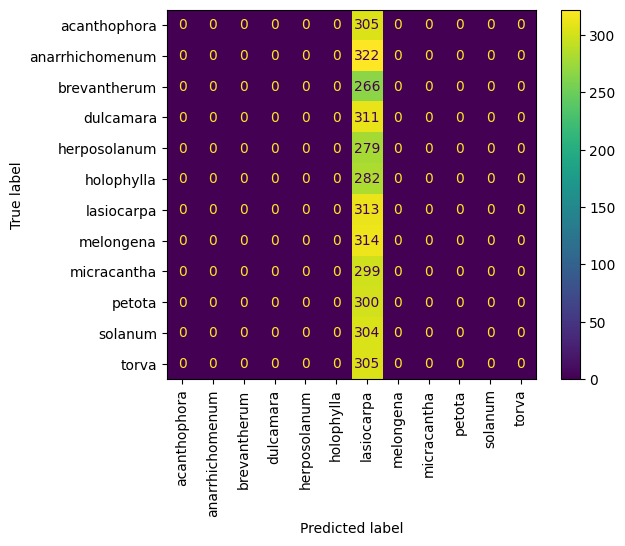



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


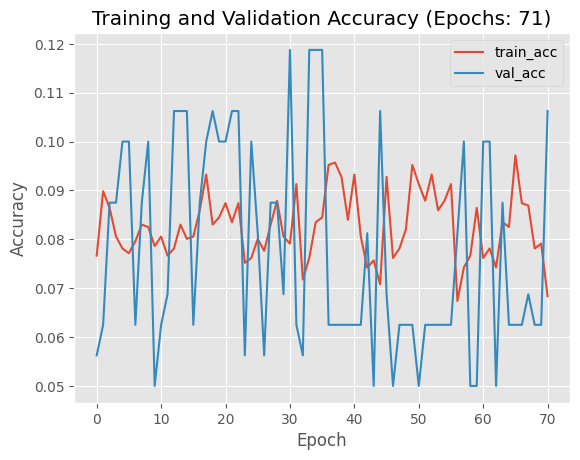

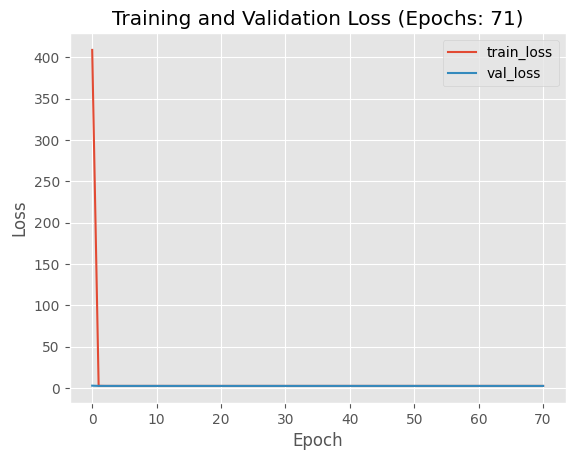



****************************
* Started at 2074.59375... *
****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
128/128 [==============================] - ETA: 0s - loss: 140.9845 - accuracy: 0.0869
Epoch 1: val_accuracy improved from -inf to 0.08125, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_20230216171100_2.h5
128/128 [==============================] - 27s 207ms/step - loss: 140.9845 - accuracy: 0.0869 - val_loss: 2.4867 - val_accuracy: 0.0812
Epoch 2/105
128/128 [==============================] - ETA: 0s - loss: 2.4871 - accuracy: 0.0884
Epoch 2: val_accuracy did not improve from 0.08125
128/128 [==============================] - 13s 102ms/step - loss: 2.4871 - accuracy: 0.0884 - val_loss: 2.4844 - val_accuracy: 0.0812
Epoch 3/105
128/128 [==============================] - ETA: 0s - loss: 2.4860 - accuracy: 0.0811
Epoch 3: val_accuracy i

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

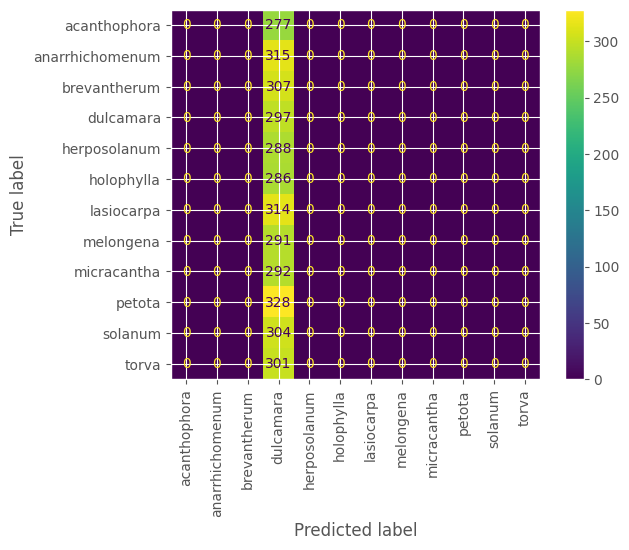



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


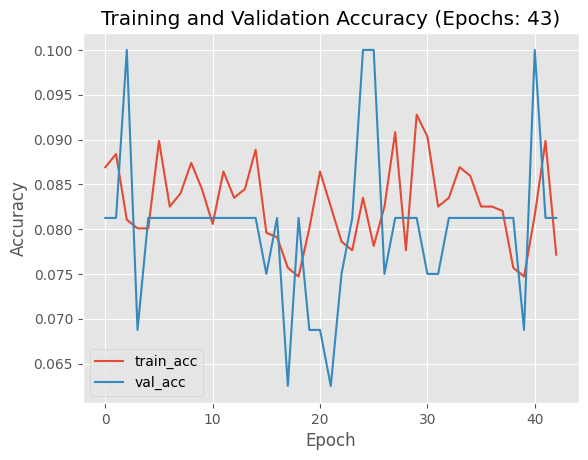

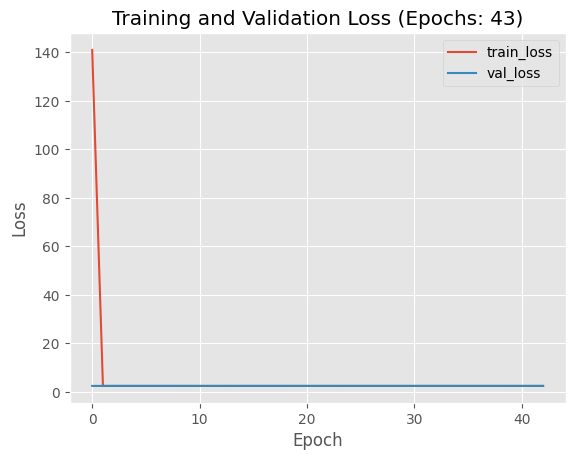



*****************************
* Started at 3323.390625... *
*****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
128/128 [==============================] - ETA: 0s - loss: 76.3238 - accuracy: 0.0898
Epoch 1: val_accuracy improved from -inf to 0.05000, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_20230216171100_3.h5
128/128 [==============================] - 28s 213ms/step - loss: 76.3238 - accuracy: 0.0898 - val_loss: 2.4914 - val_accuracy: 0.0500
Epoch 2/105
128/128 [==============================] - ETA: 0s - loss: 2.4865 - accuracy: 0.0752
Epoch 2: val_accuracy improved from 0.05000 to 0.07500, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_20230216171100_3.h5
128/128 [==============================] - 35s 273ms/step - loss: 2.4865 - accuracy: 0.0752 - val_loss: 2.4854 - val_accuracy: 0.0750
Epoch 3/105
128/12

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

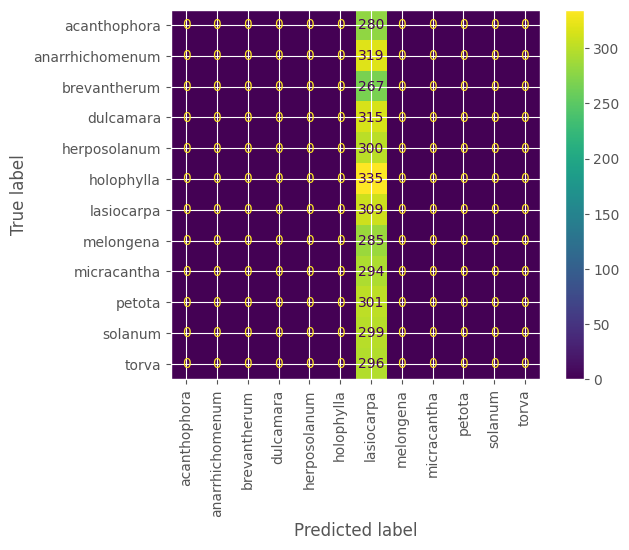



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


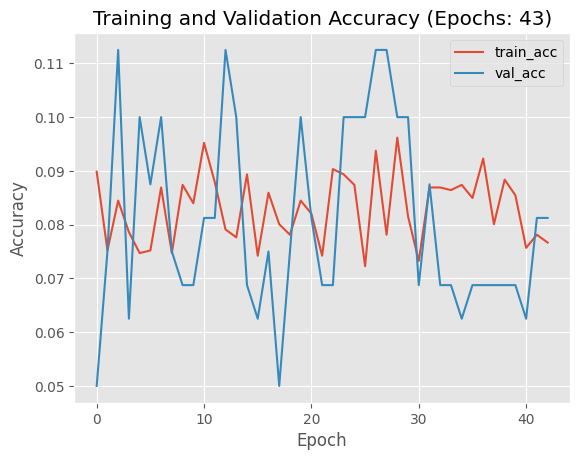

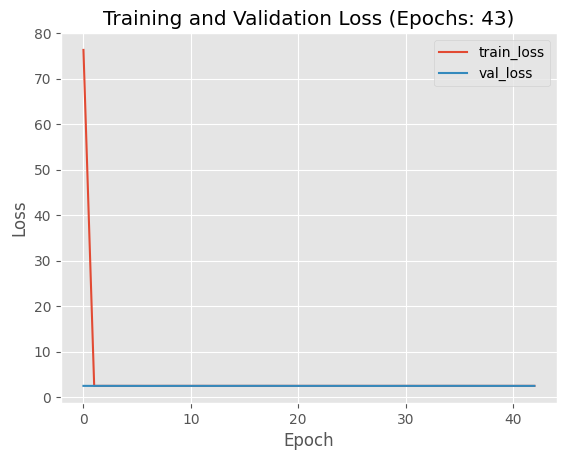



****************************
* Started at 4561.78125... *
****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
128/128 [==============================] - ETA: 0s - loss: 201.7437 - accuracy: 0.0762
Epoch 1: val_accuracy improved from -inf to 0.06875, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_20230216171100_4.h5
128/128 [==============================] - 31s 236ms/step - loss: 201.7437 - accuracy: 0.0762 - val_loss: 2.4879 - val_accuracy: 0.0688
Epoch 2/105
128/128 [==============================] - ETA: 0s - loss: 2.4928 - accuracy: 0.0889
Epoch 2: val_accuracy did not improve from 0.06875
128/128 [==============================] - 13s 101ms/step - loss: 2.4928 - accuracy: 0.0889 - val_loss: 2.4808 - val_accuracy: 0.0688
Epoch 3/105
128/128 [==============================] - ETA: 0s - loss: 2.4869 - accuracy: 0.0840
Epoch 3: val_accuracy i

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

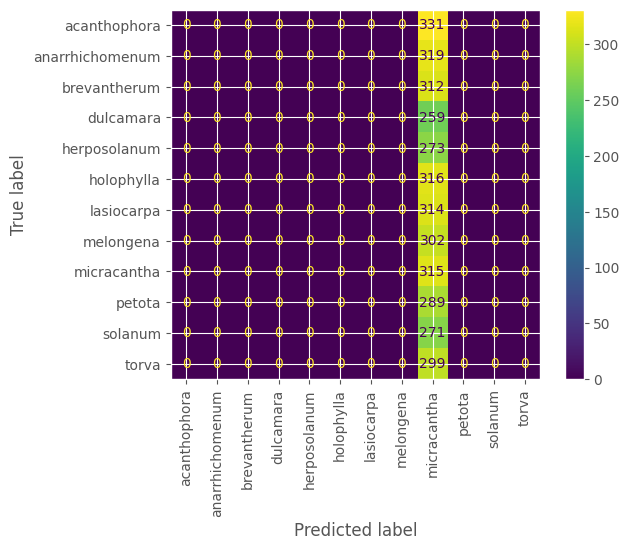



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


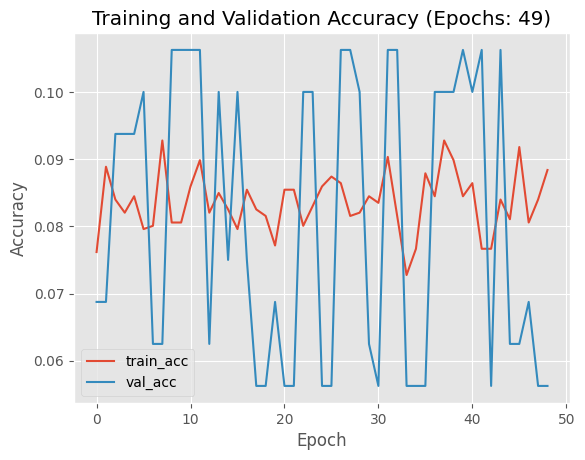

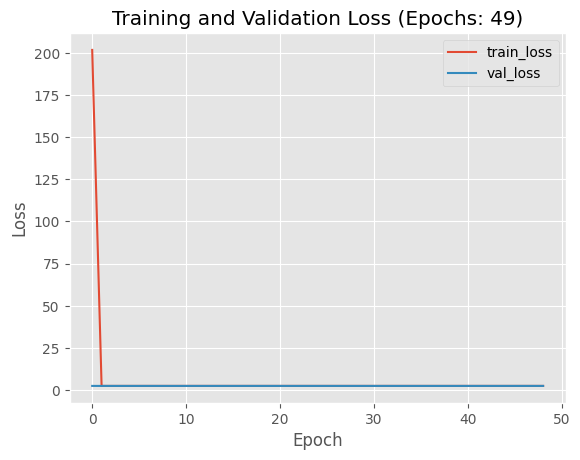



*******************************
* Mean metrics across 4 folds *
*******************************


0
accuracy                      0.085694
acanthophora.precision        0.000000
acanthophora.recall           0.000000
acanthophora.f1-score         0.000000
acanthophora.support        298.250000
anarrhichomenum.precision     0.000000
anarrhichomenum.recall        0.000000
anarrhichomenum.f1-score      0.000000
anarrhichomenum.support     318.750000
brevantherum.precision        0.000000
brevantherum.recall           0.000000
brevantherum.f1-score         0.000000
brevantherum.support        288.000000
dulcamara.precision           0.020625
dulcamara.recall              0.250000
dulcamara.f1-score            0.038106
dulcamara.support           295.500000
herposolanum.precision        0.000000
herposolanum.recall           0.000000
herposolanum.f1-score         0.000000
herposolanum.support        285.000000
holophylla.precision          0.000000
holophylla.recall             0.000000
holophylla.f1-score           0.000000
holophylla.support          304.750000
lasiocarpa.precision          0.043194
lasiocarpa.recall             0.500000
lasiocarpa.f1-score           0.079519
lasiocarpa.support          312.500000
melongena.precision           0.000000
melongena.recall              0.000000
melongena.f1-score            0.000000
melongena.support           298.000000
micracantha.precision         0.021875
micracantha.recall            0.250000
micracantha.f1-score          0.040230
micracantha.support         300.000000
petota.precision              0.000000
petota.recall                 0.000000
petota.f1-score               0.000000
petota.support              304.500000
solanum.precision             0.000000
solanum.recall                0.000000
solanum.f1-score              0.000000
solanum.support             294.500000
torva.precision               0.000000
torva.recall                  0.000000
torva.f1-score                0.000000
torva.support               300.250000
macro avg.precision           0.007141
macro avg.recall              0.083333
macro avg.f1-score            0.013155
macro avg.support          3600.000000
weighted avg.precision        0.007347
weighted avg.recall           0.085694
weighted avg.f1-score         0.013534
weighted avg.support       3600.000000

CPU times: total: 1h 39min 21s
Wall time: 50min 45s


In [ ]:
%%time

#kf = KFold(n_splits=CV_FOLDS,
#           random_state=RANDOM_SEED,
#           shuffle=True)
kf = ShuffleSplit(n_splits=CV_FOLDS,
                  test_size=VAL_SIZE,
                  random_state=RANDOM_SEED)

split = 1

vgg16_cv_val_pred = []

for train_index, val_index in kf.split(balanced_training_data):

    vgg16_tf_model = tf.keras.applications.vgg16.VGG16(
        include_top=True,
        weights=None,
        pooling="avg",
        classes=NUM_CLASSES,
        classifier_activation='softmax',
    )

    # Add an optimizer
    vgg16_tf_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    #vgg16_tf_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.003, momentum=0.9),
    #                        loss='categorical_crossentropy',
    #                        metrics=['accuracy'])

    # Add a progress bar and save checkpoints
    vgg16_callbacks = [
        create_model_checkpoint(os.path.join(DATA_ROOT_LOCATION, f"vgg16_{TRAINING_RUN_ID}_{split}.h5")),
        tf.keras.callbacks.ProgbarLogger(
            count_mode = 'steps',
            stateful_metrics = None
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            min_delta=0,
            patience=40,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]
        
    training_split_data = balanced_training_data.iloc[train_index]
    val_split_data = balanced_training_data.iloc[val_index]

    fit_params = {
        "x": training_split_data,
        "epochs": 105,
        "callbacks": vgg16_callbacks,
        "validation_data": val_split_data,
        "steps_per_epoch": 128,
        "validation_steps": 10,
    }

    preproc_func = tf.keras.applications.vgg16.preprocess_input

    with tf.device(TRAINING_DEVICE_NAME):

        vgg16_training_history = train_model(vgg16_tf_model,
                                             fit_params=fit_params,
                                             preproc_func=preproc_func)
        
        _, pred_report = evaluate_model(vgg16_tf_model,
                                        vgg16_training_history,
                                        fit_params=fit_params,
                                        preproc_func=preproc_func)
        
        vgg16_cv_val_pred.append(pred_report)
    
    split += 1

calculate_cv_mean_metrics(vgg16_cv_val_pred)


### VGG16 with ImageNet Transfer Learning



***************************
* Started at 12.171875... *
***************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 17.7204 - accuracy: 0.1318
Epoch 1: val_accuracy improved from -inf to 0.14375, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_1.h5
64/64 [==============================] - 47s 664ms/step - loss: 17.7204 - accuracy: 0.1318 - val_loss: 2.7921 - val_accuracy: 0.1437
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.1072 - accuracy: 0.2393
Epoch 2: val_accuracy improved from 0.14375 to 0.29375, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_1.h5
64/64 [==============================] - 42s 653ms/step - loss: 2.1072 - accuracy: 0.2393 - val_loss: 1.9249 - val_accuracy: 0.2937
Epoch 3/105
64/64 [=======

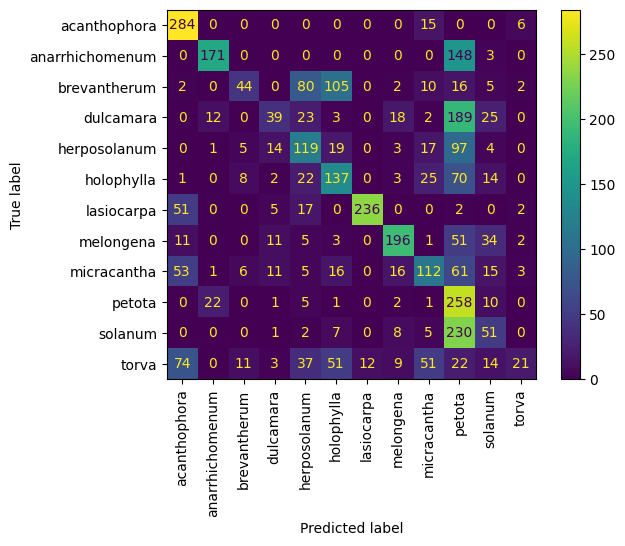



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


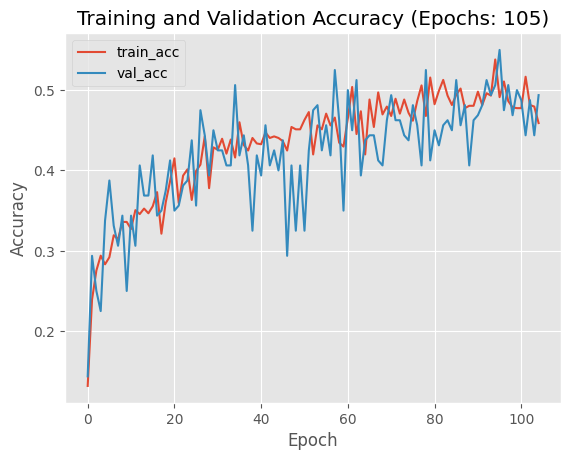

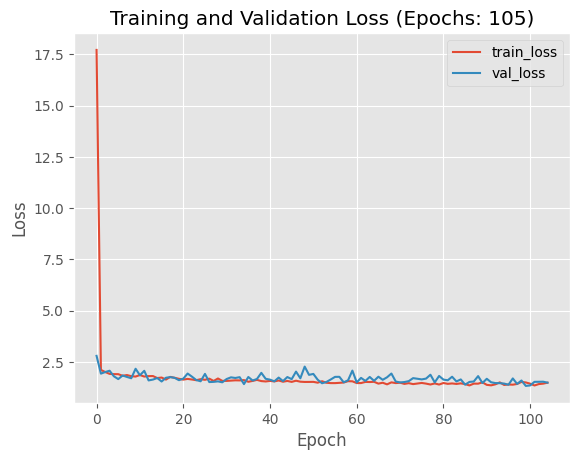



*****************************
* Started at 1211.296875... *
*****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 16.3871 - accuracy: 0.1191
Epoch 1: val_accuracy improved from -inf to 0.18125, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_2.h5
64/64 [==============================] - 28s 438ms/step - loss: 16.3871 - accuracy: 0.1191 - val_loss: 2.2480 - val_accuracy: 0.1813
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.1493 - accuracy: 0.2236
Epoch 2: val_accuracy improved from 0.18125 to 0.25000, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_2.h5
64/64 [==============================] - 27s 418ms/step - loss: 2.1493 - accuracy: 0.2236 - val_loss: 2.0837 - val_accuracy: 0.2500
Epoch 3/105
64/64 [=

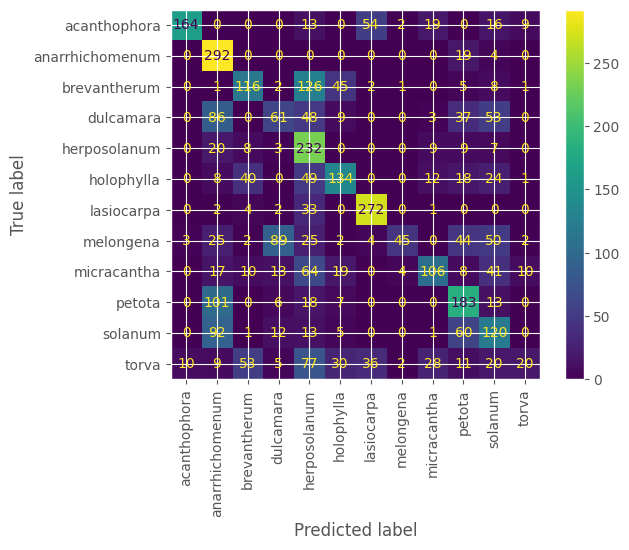



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


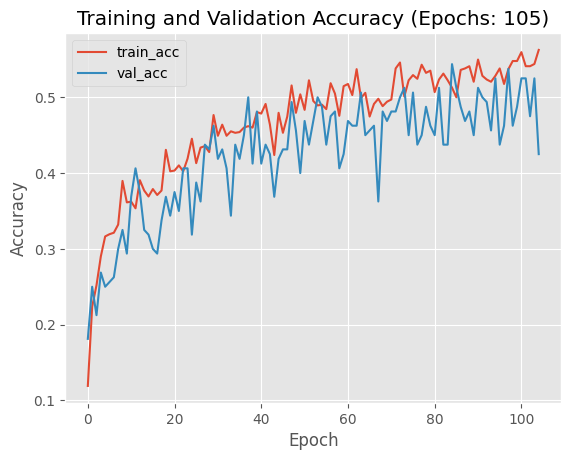

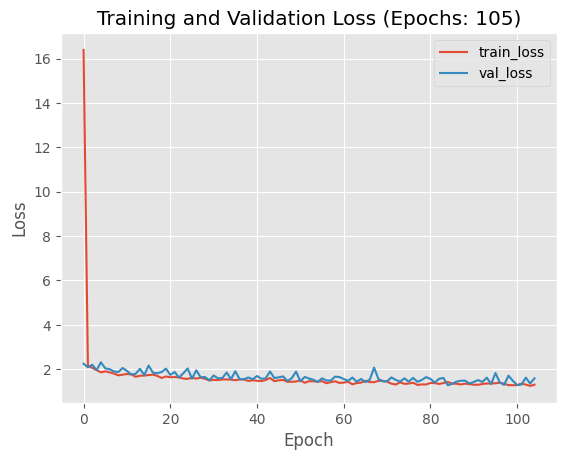



*****************************
* Started at 2373.234375... *
*****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 13.9492 - accuracy: 0.1250
Epoch 1: val_accuracy improved from -inf to 0.17500, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_3.h5
64/64 [==============================] - 26s 410ms/step - loss: 13.9492 - accuracy: 0.1250 - val_loss: 2.2366 - val_accuracy: 0.1750
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.2193 - accuracy: 0.2012
Epoch 2: val_accuracy improved from 0.17500 to 0.29375, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_3.h5
64/64 [==============================] - 24s 370ms/step - loss: 2.2193 - accuracy: 0.2012 - val_loss: 1.9254 - val_accuracy: 0.2937
Epoch 3/105
64/64 [=

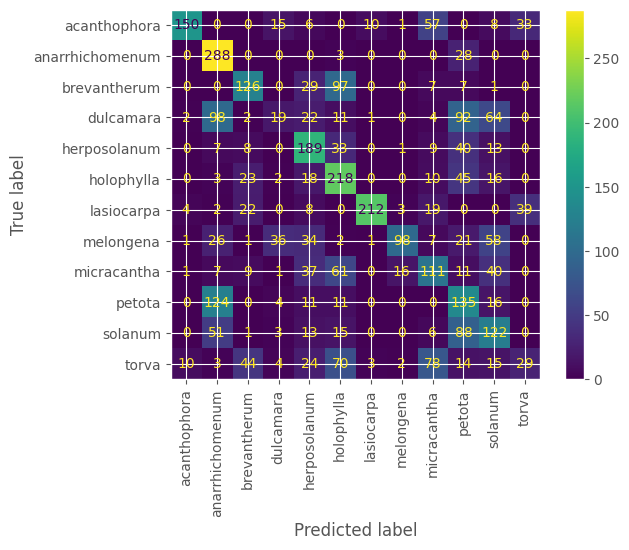



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


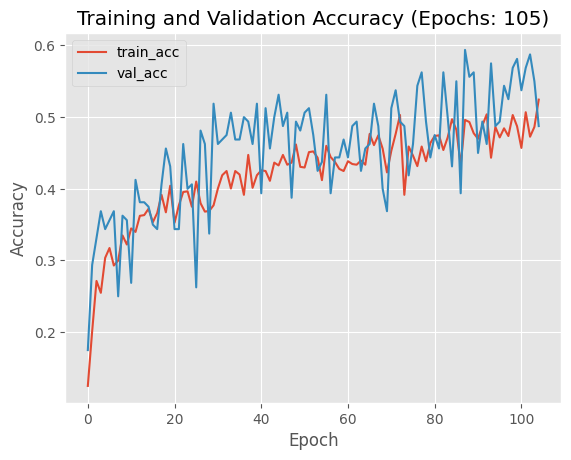

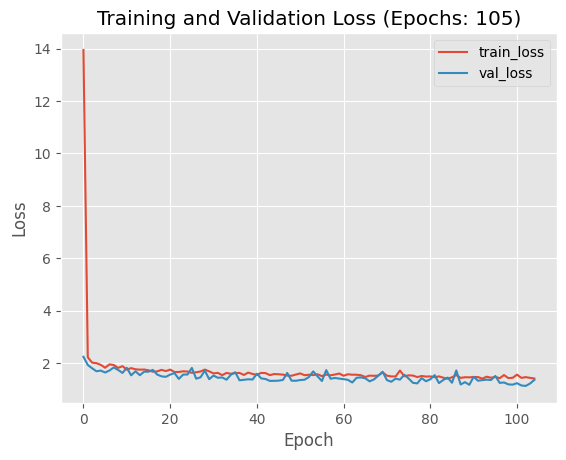



***************************
* Started at 3531.6875... *
***************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 14.9412 - accuracy: 0.1270
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_4.h5
64/64 [==============================] - 23s 360ms/step - loss: 14.9412 - accuracy: 0.1270 - val_loss: 3.7976 - val_accuracy: 0.1250
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.2030 - accuracy: 0.1904
Epoch 2: val_accuracy improved from 0.12500 to 0.21875, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16_tl_20230217091009_4.h5
64/64 [==============================] - 31s 494ms/step - loss: 2.2030 - accuracy: 0.1904 - val_loss: 1.9452 - val_accuracy: 0.2188
Epoch 3/105
64/64 [=======

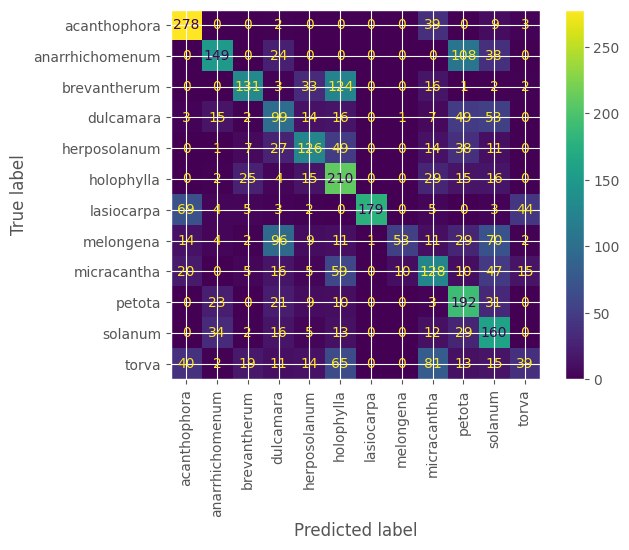



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


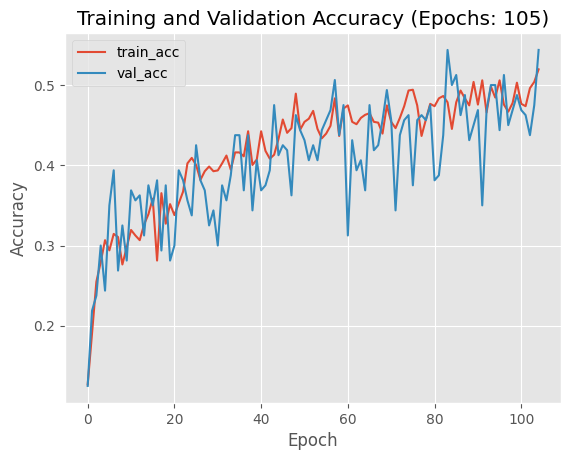

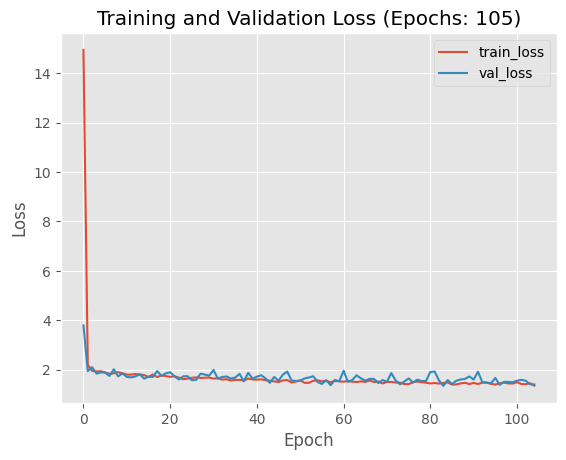



*******************************
* Mean metrics across 4 folds *
*******************************


0
accuracy                      0.475972
acanthophora.precision        0.767927
acanthophora.recall           0.724700
acanthophora.f1-score         0.713952
acanthophora.support        298.250000
anarrhichomenum.precision     0.595728
anarrhichomenum.recall        0.706986
anarrhichomenum.f1-score      0.602344
anarrhichomenum.support     318.750000
brevantherum.precision        0.571459
brevantherum.recall           0.358761
brevantherum.f1-score         0.425595
brevantherum.support        288.000000
dulcamara.precision           0.324495
dulcamara.recall              0.193336
dulcamara.f1-score            0.220247
dulcamara.support           295.500000
herposolanum.precision        0.434159
herposolanum.recall           0.580904
herposolanum.f1-score         0.479326
herposolanum.support        285.000000
holophylla.precision          0.432474
holophylla.recall             0.567413
holophylla.f1-score           0.482154
holophylla.support          304.750000
lasiocarpa.precision          0.904777
lasiocarpa.recall             0.719096
lasiocarpa.f1-score           0.788687
lasiocarpa.support          312.500000
melongena.precision           0.808505
melongena.recall              0.324550
melongena.f1-score            0.429940
melongena.support           298.000000
micracantha.precision         0.448051
micracantha.recall            0.380374
micracantha.f1-score          0.405778
micracantha.support         300.000000
petota.precision              0.341838
petota.recall                 0.632698
petota.f1-score               0.426575
petota.support              304.500000
solanum.precision             0.331441
solanum.recall                0.390233
solanum.f1-score              0.347896
solanum.support             294.500000
torva.precision               0.426752
torva.recall                  0.090926
torva.f1-score                0.144653
torva.support               300.250000
macro avg.precision           0.532301
macro avg.recall              0.472498
macro avg.f1-score            0.455596
macro avg.support          3600.000000
weighted avg.precision        0.533449
weighted avg.recall           0.475972
weighted avg.f1-score         0.458047
weighted avg.support       3600.000000

CPU times: total: 1h 17min 53s
Wall time: 1h 7min 28s


In [ ]:
%%time

kf = ShuffleSplit(n_splits=CV_FOLDS,
                  test_size=VAL_SIZE,
                  random_state=RANDOM_SEED)

split = 1

vgg16_tl_cv_val_pred = []

for train_index, val_index in kf.split(balanced_training_data):

    vgg16_tl_model = tf.keras.applications.vgg16.VGG16(
        include_top=True,
        weights='imagenet',
        pooling="avg",
        # classes=12,
        classifier_activation='softmax',
    )

    # Change the output prediction layer to support the 12 classes instead of the 1000 classes in ImageNet
    output = vgg16_tl_model.layers[-2].output
    predictions = tf.keras.layers.Dense(NUM_CLASSES,
                                        activation="softmax")(output)
    vgg16_tl_model = tf.keras.Model(inputs = vgg16_tl_model.input,
                                    outputs = predictions)

    # Freeze all layers but the FC and output
    for layer in (vgg16_tl_model.layers)[:19]:
        layer.trainable = False

    # Add an optimizer
    vgg16_tl_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    #vgg16_tl_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    #                        loss='categorical_crossentropy',
    #                        metrics=['accuracy'])
        
    training_split_data = balanced_training_data.iloc[train_index]
    val_split_data = balanced_training_data.iloc[val_index]

    # Add a progress bar and save checkpoints
    vgg16_tl_callbacks = [
        create_model_checkpoint(os.path.join(DATA_ROOT_LOCATION, f"vgg16_tl_{TRAINING_RUN_ID}_{split}.h5")),
        tf.keras.callbacks.ProgbarLogger(
            count_mode = 'steps',
            stateful_metrics = None
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            min_delta=0,
            patience=40,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]

    fit_params = {
                    "x": training_split_data,
                    "epochs": 105,
                    "callbacks": vgg16_tl_callbacks,
                    "validation_data": val_split_data,
                    "steps_per_epoch": 64,
                    "validation_steps": 10,
                    }
    
    preproc_func = tf.keras.applications.vgg16.preprocess_input
        
    with tf.device(TRAINING_DEVICE_NAME):

        vgg16_tl_training_history = train_model(vgg16_tl_model,
                                                fit_params=fit_params,
                                                preproc_func=preproc_func)
        
        _, pred_report = evaluate_model(vgg16_tl_model,
                                        vgg16_tl_training_history,
                                        fit_params=fit_params,
                                        preproc_func=preproc_func)
    
        vgg16_tl_cv_val_pred.append(pred_report)

    split += 1

calculate_cv_mean_metrics(vgg16_tl_cv_val_pred)

### ResNET50



**************************
* Started at 11.59375... *
**************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 3.9523 - accuracy: 0.0850
Epoch 1: val_accuracy improved from -inf to 0.06875, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_20230216150341_1.h5
64/64 [==============================] - 16s 141ms/step - loss: 3.9523 - accuracy: 0.0850 - val_loss: 3304.0222 - val_accuracy: 0.0688
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.5358 - accuracy: 0.1260
Epoch 2: val_accuracy improved from 0.06875 to 0.13750, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_20230216150341_1.h5
64/64 [==============================] - 13s 200ms/step - loss: 2.5358 - accuracy: 0.1260 - val_loss: 13.0022 - val_accuracy: 0.1375
Epoch 3/105
64/64 [========

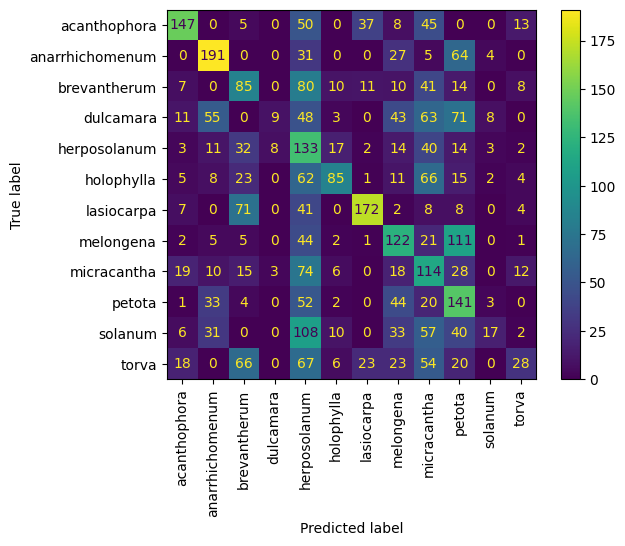



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


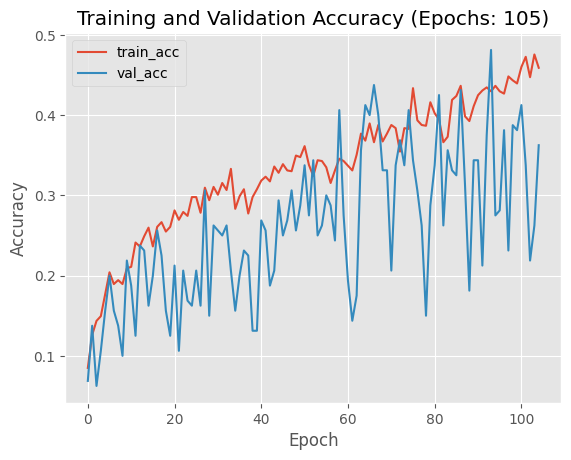

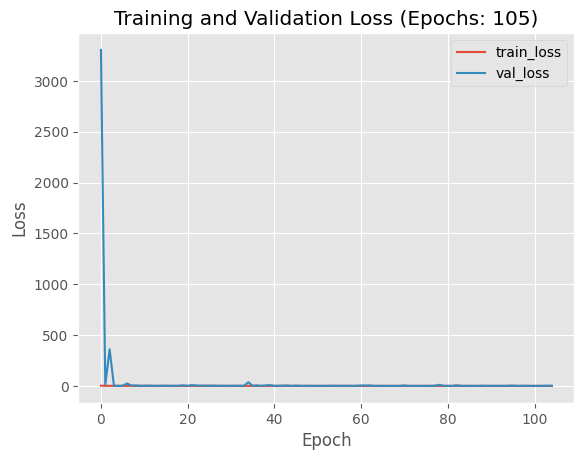



*****************************
* Started at 1455.921875... *
*****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 3.9492 - accuracy: 0.0811
Epoch 1: val_accuracy improved from -inf to 0.08125, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_20230216150341_2.h5
64/64 [==============================] - 12s 123ms/step - loss: 3.9492 - accuracy: 0.0811 - val_loss: 14135.5830 - val_accuracy: 0.0812
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.8075 - accuracy: 0.1084
Epoch 2: val_accuracy did not improve from 0.08125
64/64 [==============================] - 7s 103ms/step - loss: 2.8075 - accuracy: 0.1084 - val_loss: 44.9530 - val_accuracy: 0.0812
Epoch 3/105
64/64 [==============================] - ETA: 0s - loss: 2.5349 - accuracy: 0.1465
Epoch 3: val_accuracy did n

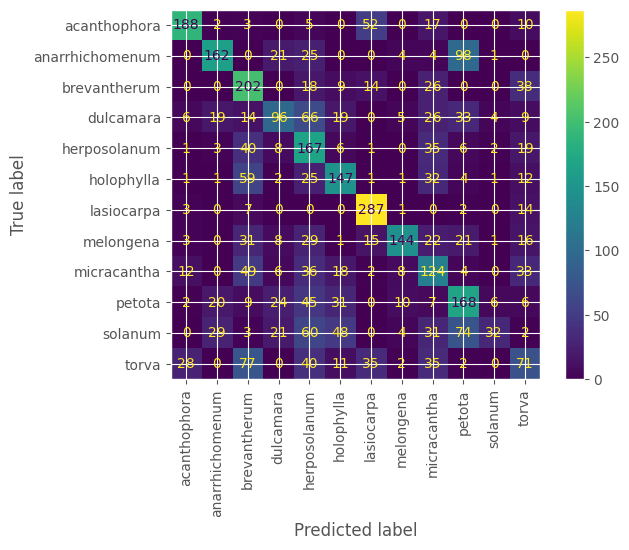



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


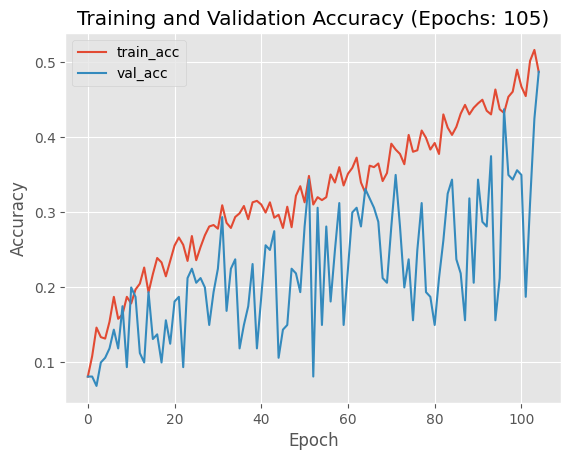

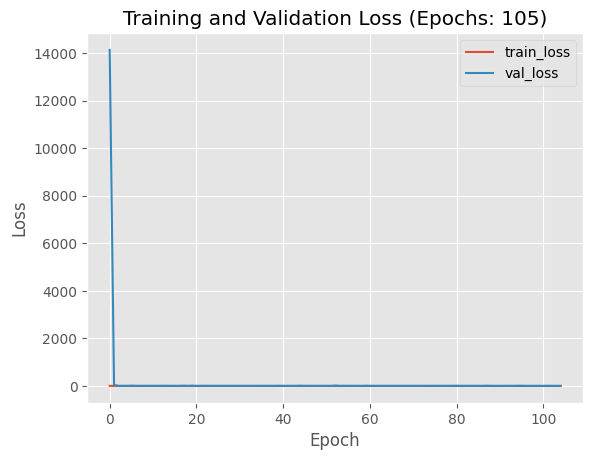



*****************************
* Started at 2871.140625... *
*****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 4.0296 - accuracy: 0.0947
Epoch 1: val_accuracy improved from -inf to 0.09375, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_20230216150341_3.h5
64/64 [==============================] - 11s 122ms/step - loss: 4.0296 - accuracy: 0.0947 - val_loss: 7.1974 - val_accuracy: 0.0938
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 3.0052 - accuracy: 0.1094
Epoch 2: val_accuracy did not improve from 0.09375
64/64 [==============================] - 7s 104ms/step - loss: 3.0052 - accuracy: 0.1094 - val_loss: 3251.5769 - val_accuracy: 0.0812
Epoch 3/105
64/64 [==============================] - ETA: 0s - loss: 2.6046 - accuracy: 0.1270
Epoch 3: val_accuracy improve

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

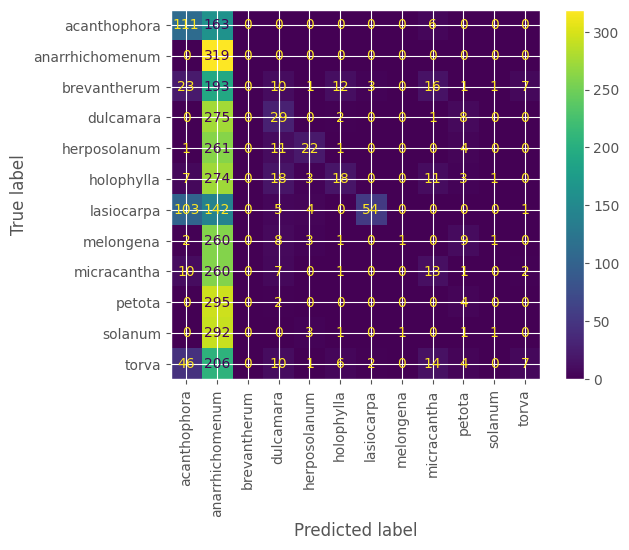



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


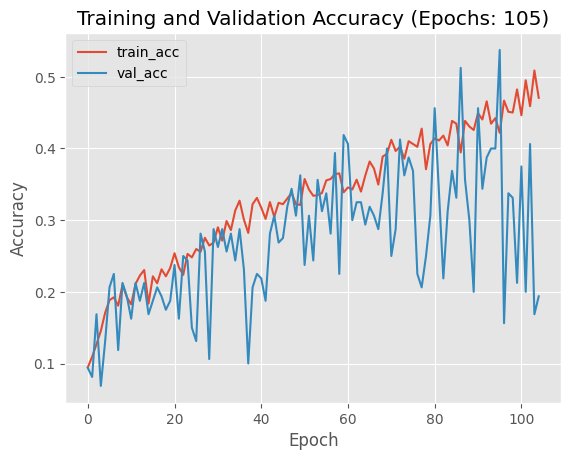

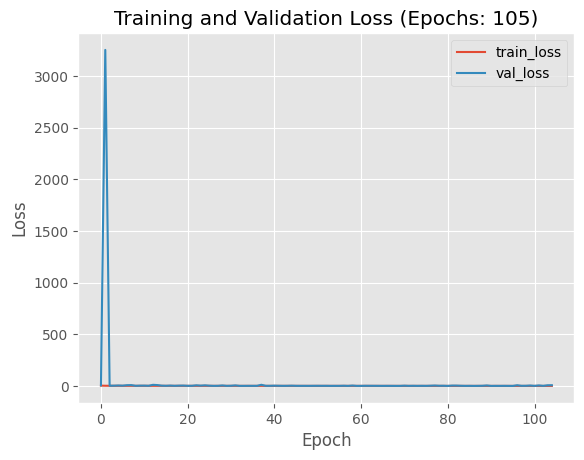



****************************
* Started at 4290.03125... *
****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 3.9890 - accuracy: 0.0918
Epoch 1: val_accuracy improved from -inf to 0.08750, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_20230216150341_4.h5
64/64 [==============================] - 12s 125ms/step - loss: 3.9890 - accuracy: 0.0918 - val_loss: 56.2198 - val_accuracy: 0.0875
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 2.8317 - accuracy: 0.1094
Epoch 2: val_accuracy did not improve from 0.08750
64/64 [==============================] - 7s 108ms/step - loss: 2.8317 - accuracy: 0.1094 - val_loss: 1518.9069 - val_accuracy: 0.0750
Epoch 3/105
64/64 [==============================] - ETA: 0s - loss: 2.6752 - accuracy: 0.1299
Epoch 3: val_accuracy improved 

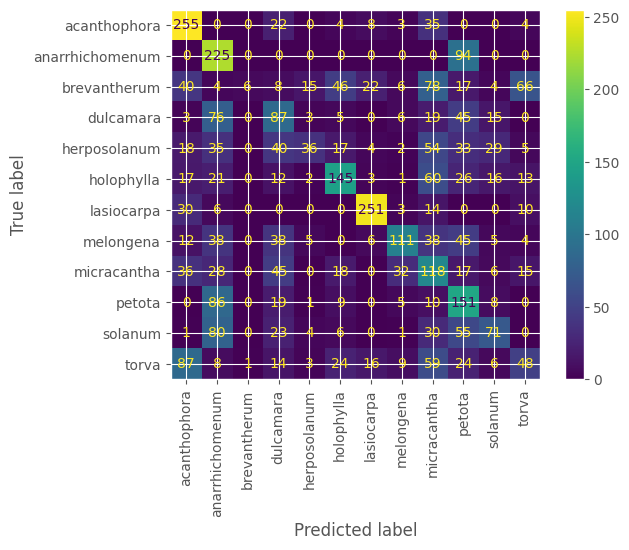



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


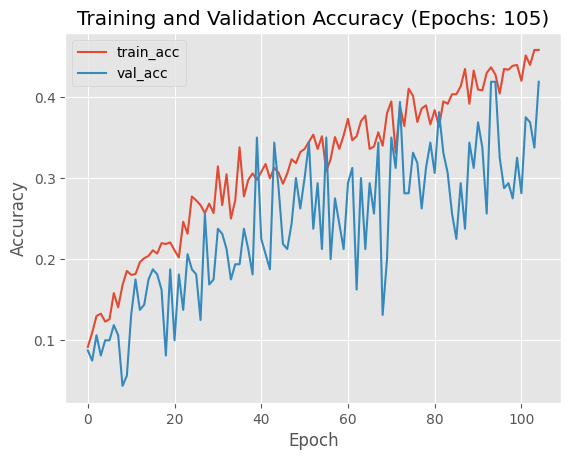

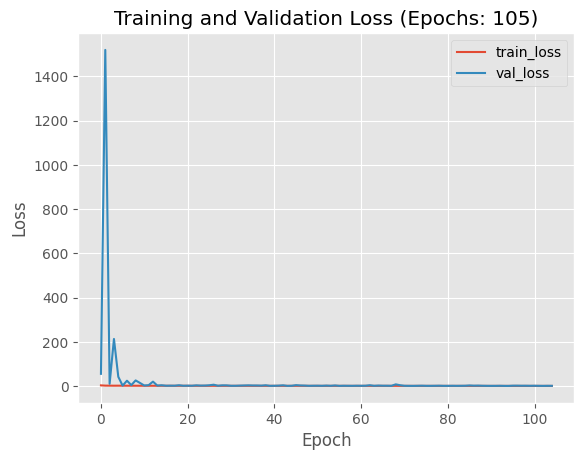



*******************************
* Mean metrics across 4 folds *
*******************************


0
accuracy                      0.355208
acanthophora.precision        0.574573
acanthophora.recall           0.581872
acanthophora.f1-score         0.567652
acanthophora.support        298.250000
anarrhichomenum.precision     0.430213
anarrhichomenum.recall        0.703196
anarrhichomenum.f1-score      0.460831
anarrhichomenum.support     318.750000
brevantherum.precision        0.385957
brevantherum.recall           0.249190
brevantherum.f1-score         0.209797
brevantherum.support        288.000000
dulcamara.precision           0.384649
dulcamara.recall              0.195036
dulcamara.f1-score            0.224633
dulcamara.support           295.500000
herposolanum.precision        0.402083
herposolanum.recall           0.315441
herposolanum.f1-score         0.251336
herposolanum.support        285.000000
holophylla.precision          0.516875
holophylla.recall             0.331999
holophylla.f1-score           0.374831
holophylla.support          304.750000
lasiocarpa.precision          0.781612
lasiocarpa.recall             0.609413
lasiocarpa.f1-score           0.627092
lasiocarpa.support          312.500000
melongena.precision           0.567061
melongena.recall              0.313610
melongena.f1-score            0.361499
melongena.support           298.000000
micracantha.precision         0.250282
micracantha.recall            0.306187
micracantha.f1-score          0.253060
micracantha.support         300.000000
petota.precision              0.271986
petota.recall                 0.379494
petota.f1-score               0.299666
petota.support              304.500000
solanum.precision             0.458515
solanum.recall                0.106630
solanum.f1-score              0.154527
solanum.support             294.500000
torva.precision               0.347437
torva.recall                  0.127967
torva.f1-score                0.166701
torva.support               300.250000
macro avg.precision           0.447604
macro avg.recall              0.351670
macro avg.f1-score            0.329302
macro avg.support          3600.000000
weighted avg.precision        0.450277
weighted avg.recall           0.355208
weighted avg.f1-score         0.331415
weighted avg.support       3600.000000

CPU times: total: 1h 34min 59s
Wall time: 51min 42s


In [ ]:
%%time

kf = ShuffleSplit(n_splits=CV_FOLDS,
                  test_size=VAL_SIZE,
                  random_state=RANDOM_SEED)

split = 1

resnet50_cv_val_pred = []

for train_index, val_index in kf.split(balanced_training_data):

    resnet50_model = tf.keras.applications.ResNet50(
        pooling="avg",
        include_top=True,
        weights=None,
        classes=NUM_CLASSES,
        classifier_activation='softmax'
    )

    # Add an optimizer
    resnet50_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    # resnet50_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.003, momentum=0.9),
    #                        loss='categorical_crossentropy',
    #                        metrics=['accuracy'])

    training_split_data = balanced_training_data.iloc[train_index]
    val_split_data = balanced_training_data.iloc[val_index]

    # Add a progress bar and save checkpoints
    resnet50_callbacks = [
        create_model_checkpoint(os.path.join(DATA_ROOT_LOCATION, f"resnet50_{TRAINING_RUN_ID}_{split}.h5")),
        tf.keras.callbacks.ProgbarLogger(
            count_mode = 'steps',
            stateful_metrics = None
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            min_delta=0,
            patience=40,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]

    fit_params = {
            "x": training_split_data,
            "epochs": 105,
            "callbacks": resnet50_callbacks,
            "validation_data": val_split_data,
            "steps_per_epoch": 64,
            "validation_steps": 10,
    }

    preproc_func = tf.keras.applications.resnet50.preprocess_input
    
    with tf.device(TRAINING_DEVICE_NAME):

        resnet50_training_history = train_model(resnet50_model,
                                                fit_params=fit_params,
                                                preproc_func=preproc_func)
        
        _, pred_report = evaluate_model(resnet50_model,
                                        resnet50_training_history,
                                        fit_params=fit_params,
                                        preproc_func=preproc_func)
    
        resnet50_cv_val_pred.append(pred_report)
    
    split += 1

calculate_cv_mean_metrics(resnet50_cv_val_pred)


### RestNet50 with ImageNet Transfer Learning



****************************
* Started at 4408.09375... *
****************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 9.7812 - accuracy: 0.1016
Epoch 1: val_accuracy improved from -inf to 0.10625, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_1.h5
64/64 [==============================] - 11s 136ms/step - loss: 9.7812 - accuracy: 0.1016 - val_loss: 10.5562 - val_accuracy: 0.1063
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 4.6693 - accuracy: 0.1172
Epoch 2: val_accuracy improved from 0.10625 to 0.11250, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_1.h5
64/64 [==============================] - 8s 123ms/step - loss: 4.6693 - accuracy: 0.1172 - val_loss: 2.6248 - val_accuracy: 0.1125
Epoch 3/105
64/64 [

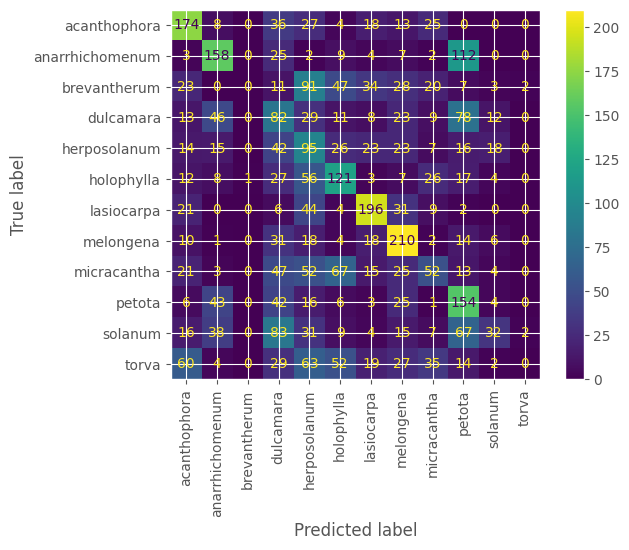



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


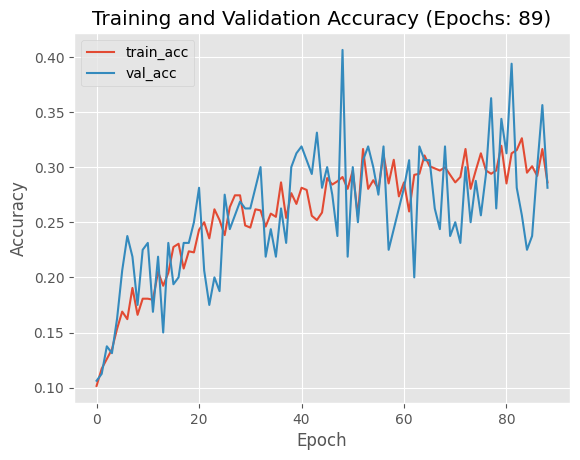

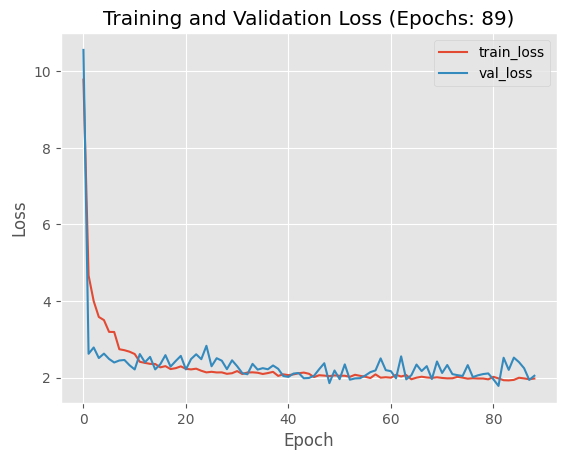



************************
* Started at 5497.0... *
************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 9.8503 - accuracy: 0.0977
Epoch 1: val_accuracy improved from -inf to 0.08125, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_2.h5
64/64 [==============================] - 11s 134ms/step - loss: 9.8503 - accuracy: 0.0977 - val_loss: 22.7142 - val_accuracy: 0.0812
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 4.5344 - accuracy: 0.1270
Epoch 2: val_accuracy improved from 0.08125 to 0.08750, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_2.h5
64/64 [==============================] - 8s 119ms/step - loss: 4.5344 - accuracy: 0.1270 - val_loss: 3.2108 - val_accuracy: 0.0875
Epoch 3/105
64/64 [============

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

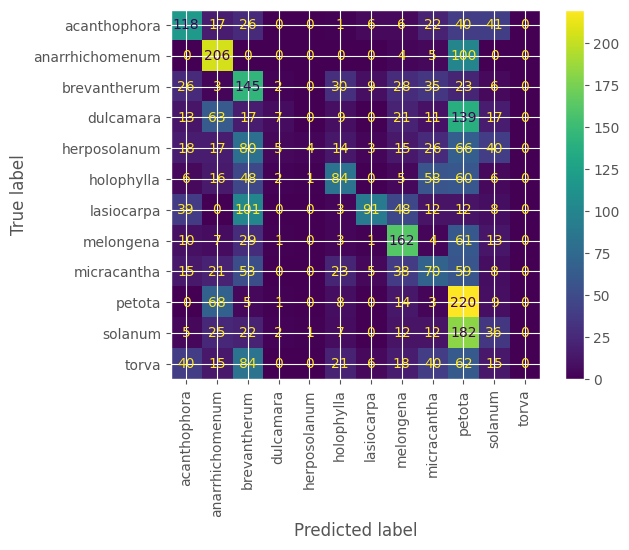



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


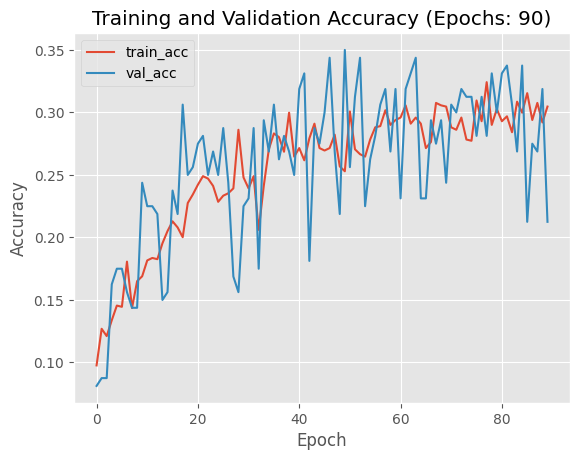

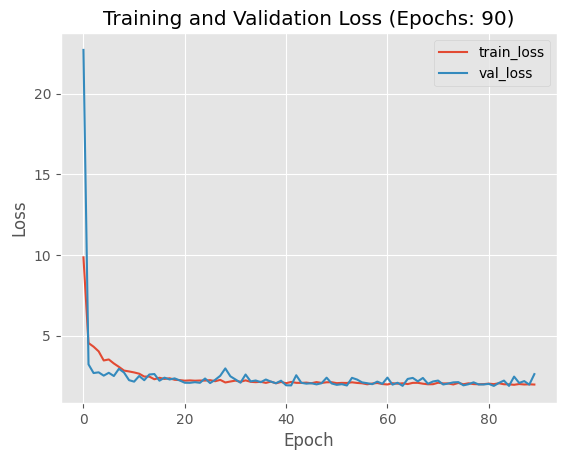



***************************
* Started at 6597.8125... *
***************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 11.1766 - accuracy: 0.1152
Epoch 1: val_accuracy improved from -inf to 0.10625, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_3.h5
64/64 [==============================] - 11s 133ms/step - loss: 11.1766 - accuracy: 0.1152 - val_loss: 43.4558 - val_accuracy: 0.1063
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 3.6561 - accuracy: 0.1084
Epoch 2: val_accuracy did not improve from 0.10625
64/64 [==============================] - 7s 113ms/step - loss: 3.6561 - accuracy: 0.1084 - val_loss: 9.2981 - val_accuracy: 0.1000
Epoch 3/105
64/64 [==============================] - ETA: 0s - loss: 3.5347 - accuracy: 0.1338
Epoch 3: val_accuracy improved f

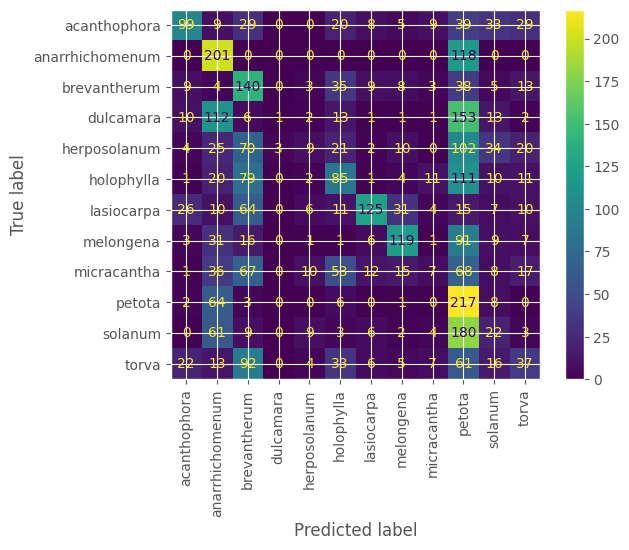



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


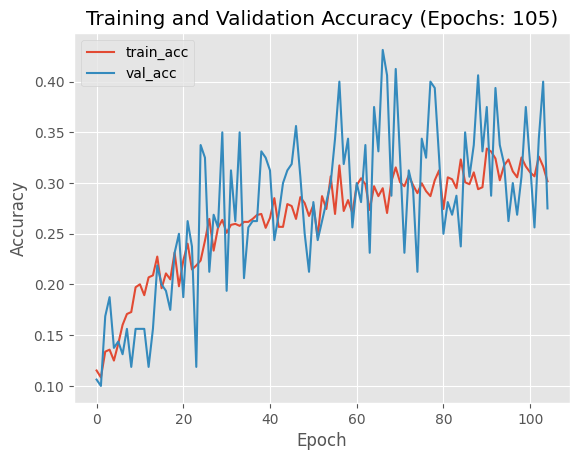

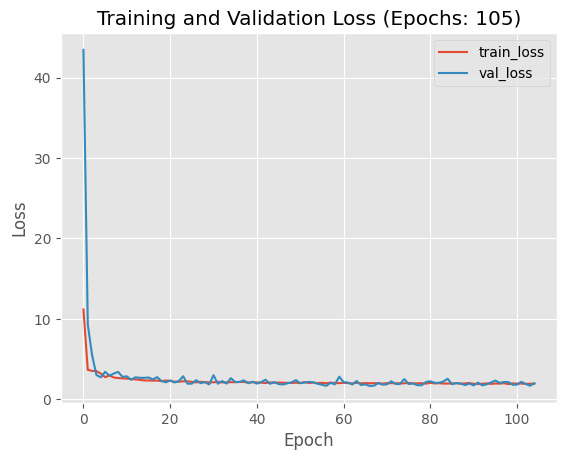



**************************
* Started at 7869.375... *
**************************
Found 14400 validated image filenames belonging to 12 classes.
Found 3600 validated image filenames belonging to 12 classes.
Epoch 1/105
64/64 [==============================] - ETA: 0s - loss: 10.8682 - accuracy: 0.1182
Epoch 1: val_accuracy improved from -inf to 0.10625, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_4.h5
64/64 [==============================] - 11s 131ms/step - loss: 10.8682 - accuracy: 0.1182 - val_loss: 27.3072 - val_accuracy: 0.1063
Epoch 2/105
64/64 [==============================] - ETA: 0s - loss: 3.4741 - accuracy: 0.1201
Epoch 2: val_accuracy improved from 0.10625 to 0.12500, saving model to P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\resnet50_tl_20230216202451_4.h5
64/64 [==============================] - 8s 123ms/step - loss: 3.4741 - accuracy: 0.1201 - val_loss: 7.4388 - val_accuracy: 0.1250
Epoch 3/105
64/64 [====

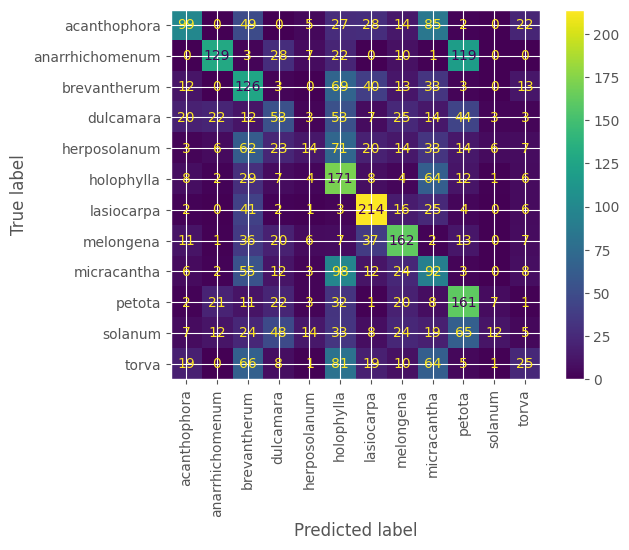



**************************************
* Train/Val Accuracy and Loss graphs *
**************************************


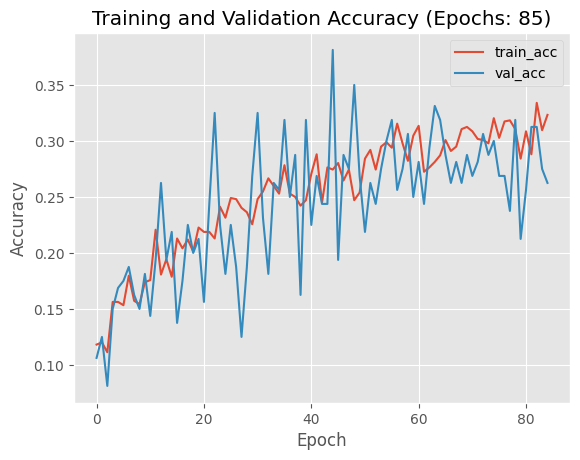

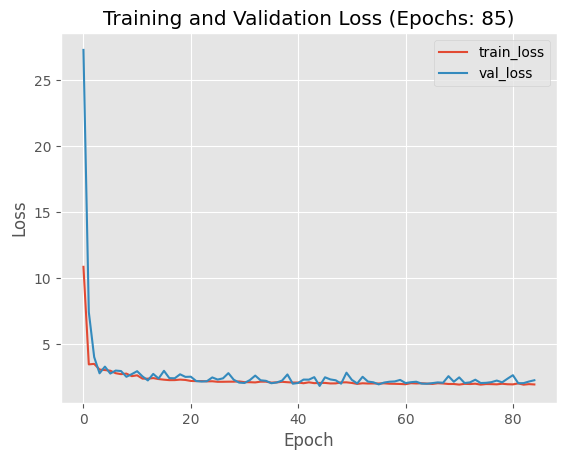



*******************************
* Mean metrics across 4 folds *
*******************************


0
accuracy                      0.328958
acanthophora.precision        0.489129
acanthophora.recall           0.412287
acanthophora.f1-score         0.435882
acanthophora.support        298.250000
anarrhichomenum.precision     0.485494
anarrhichomenum.recall        0.544784
anarrhichomenum.f1-score      0.492074
anarrhichomenum.support     318.750000
brevantherum.precision        0.181580
brevantherum.recall           0.350126
brevantherum.f1-score         0.238469
brevantherum.support        288.000000
dulcamara.precision           0.253097
dulcamara.recall              0.123761
dulcamara.f1-score            0.120356
dulcamara.support           295.500000
herposolanum.precision        0.318281
herposolanum.recall           0.108918
herposolanum.f1-score         0.099920
herposolanum.support        285.000000
holophylla.precision          0.327192
holophylla.recall             0.379414
holophylla.f1-score           0.336098
holophylla.support          304.750000
lasiocarpa.precision          0.643389
lasiocarpa.recall             0.500517
lasiocarpa.f1-score           0.533530
lasiocarpa.support          312.500000
melongena.precision           0.498678
melongena.recall              0.544865
melongena.f1-score            0.512118
melongena.support           298.000000
micracantha.precision         0.214898
micracantha.recall            0.182378
micracantha.f1-score          0.183145
micracantha.support         300.000000
petota.precision              0.267569
petota.recall                 0.615522
petota.f1-score               0.360635
petota.support              304.500000
solanum.precision             0.272677
solanum.recall                0.085386
solanum.f1-score              0.120557
solanum.support             294.500000
torva.precision               0.122760
torva.recall                  0.052153
torva.f1-score                0.072668
torva.support               300.250000
macro avg.precision           0.339562
macro avg.recall              0.325009
macro avg.f1-score            0.292121
macro avg.support          3600.000000
weighted avg.precision        0.341608
weighted avg.recall           0.328958
weighted avg.f1-score         0.295240
weighted avg.support       3600.000000

CPU times: total: 1h 15min 3s
Wall time: 45min 29s


In [ ]:
%%time

kf = ShuffleSplit(n_splits=CV_FOLDS,
                  test_size=VAL_SIZE,
                  random_state=RANDOM_SEED)

split = 1

resnet50_tl_cv_val_pred = []

for train_index, val_index in kf.split(balanced_training_data):

    resnet50_tl_model = tf.keras.models.Sequential(name="resnet50_imagenet")

    imagenet_resnet50_model= tf.keras.applications.ResNet50(
        include_top=False,
        pooling="max",
        input_shape=(224,224,3),
        classes=NUM_CLASSES,
        weights='imagenet',)

    for layer in imagenet_resnet50_model.layers[:-14]:
        layer.trainable=False


    # Add a custom FC layer for actual learning
    resnet50_tl_model.add(imagenet_resnet50_model)
    resnet50_tl_model.add(tf.keras.layers.Flatten())
    #resnet50_tl_model.add(tf.keras.layers.Dense(4096, activation='relu'))
    #resnet50_tl_model.add(tf.keras.layers.Dense(4096, activation='relu'))
    resnet50_tl_model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

    # Add an optimizer
    resnet50_tl_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
    #resnet50_tl_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.003, momentum=0.9),
    #                        loss='categorical_crossentropy',
    #                        metrics=['accuracy'])
        
    training_split_data = balanced_training_data.iloc[train_index]
    val_split_data = balanced_training_data.iloc[val_index]

        # Add a progress bar and save checkpoints
    resnet50_tl_callbacks = [
        create_model_checkpoint(os.path.join(DATA_ROOT_LOCATION, f"resnet50_tl_{TRAINING_RUN_ID}_{split}.h5")),
        tf.keras.callbacks.ProgbarLogger(
            count_mode = 'steps',
            stateful_metrics = None
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            min_delta=0,
            patience=40,
            verbose=1,
            mode='auto',
            restore_best_weights=True
        )
    ]

    fit_params = {
        "x": training_split_data,
        "epochs": 105,
        "callbacks": resnet50_tl_callbacks,
        "validation_data": val_split_data,
        "steps_per_epoch": 64,
        "validation_steps": 10,
    }

    preproc_func = tf.keras.applications.resnet50.preprocess_input

    with tf.device(TRAINING_DEVICE_NAME):

        resnet50_tl_training_history = train_model(resnet50_tl_model,
                                                   fit_params=fit_params,
                                                   preproc_func=preproc_func)
        
        _, pred_report = evaluate_model(resnet50_tl_model,
                                        resnet50_tl_training_history,
                                        fit_params=fit_params,
                                        preproc_func=preproc_func)
        
        resnet50_tl_cv_val_pred.append(pred_report)
    
    split += 1

calculate_cv_mean_metrics(resnet50_tl_cv_val_pred)


## Hyperparameter search for the best performing model

Given the previous results, we'll move on to do a grid search to find the best
hyperparameters for the model.



In [ ]:
bal_training_set, bal_val_set = split_balanced_dataset(balanced_training_data, 0.1, is_verbose=False)
print(f">>>Train DF: {bal_training_set.shape}\n   Test DF: {bal_val_set.shape}")


>>>Train DF: (16200, 6)
   Test DF: (1800, 6)


In [ ]:
"""
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

https://keras.io/guides/keras_tuner/getting_started/
https://keras.io/api/keras_tuner/hyperparameters/#choice-method
https://keras.io/guides/keras_tuner/custom_tuner/

"""
import keras_tuner


class MyBestArchitecture(keras_tuner.HyperModel):

    def build(self, hp):

        # Hyperparameters to tune
        model_pooling = hp.Choice("pooling", 
                                  ["avg", "max"],
                                  default="max")
        learning_rate = hp.Choice("learning_rate",
                                  [0.001, 0.01, 0.003, 0.03, 0.006, 0.06],
                                  default=0.01)
        trainable_layers_limit = hp.Choice("trainable_layers",
                                           [-1, -3, -4, -5],
                                           default=-1)
        optimizer_name = hp.Choice("optimizer",
                                   ["sgd", "adam"],
                                   default="sgd")

        vgg16_tl_model = tf.keras.applications.vgg16.VGG16(
            include_top=True,
            weights='imagenet',
            pooling=model_pooling,
            classifier_activation='softmax',
        )

        # Change the output prediction layer to support the 12 classes instead of the 1000 classes in ImageNet
        output = vgg16_tl_model.layers[-2].output
        predictions = tf.keras.layers.Dense(NUM_CLASSES,
                                            activation="softmax")(output)
        vgg16_tl_model = tf.keras.Model(inputs = vgg16_tl_model.input,
                                        outputs = predictions)

        # Freeze all layers but the FC and output
        for layer in (vgg16_tl_model.layers)[:trainable_layers_limit]:
            layer.trainable = False

        # Add an optimizer
        with hp.conditional_scope("optimizer", ["adam"]):
            if optimizer_name == "adam":
                optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        with hp.conditional_scope("optimizer", ["sgd"]):
            if optimizer_name == "sgd":
                optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
                
        vgg16_tl_model.compile(optimizer=optimizer,
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])
        
        return vgg16_tl_model
    
    def fit(self, hp, model, x, y, **kwargs):

        # More hyperparameter to tune
        batch_size = hp.Choice("batch_size", [16, 32, 64, 128], default=32)
        
        # Add a progress bar and save checkpoints
        vgg16_tl_callbacks = [
            # create_model_checkpoint(os.path.join(DATA_ROOT_LOCATION, f"vgg16_hyperparam_{TRAINING_RUN_ID}.h5")),
            tf.keras.callbacks.ProgbarLogger(
                count_mode = 'steps',
                stateful_metrics = None
            ),
            tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                min_delta=0,
                patience=64,
                verbose=1,
                mode='auto',
                restore_best_weights=True
            )
        ]

        preproc_func = tf.keras.applications.vgg16.preprocess_input

        train_data_gen = get_train_generator(preproc_func, bal_training_set, batch_size)
        val_data_gen = get_val_generator(bal_val_set, preproc_func, batch_size)

        kwargs["callbacks"].extend(vgg16_tl_callbacks)

        fit_params = {
                        "x": train_data_gen, 
                        "validation_data": val_data_gen,
                        "steps_per_epoch": 64,
                        "validation_steps": 10,
                        "workers": 10,
                     }
        
        tf.keras.backend.clear_session()

        with tf.device(TRAINING_DEVICE_NAME):
            history = model.fit(**fit_params, **kwargs)

        return history

In [ ]:
%%time
random_tuner = keras_tuner.RandomSearch(
    MyBestArchitecture(),
    objective="val_accuracy",
    max_trials=4,
    seed=RANDOM_SEED,
    overwrite=True,
    directory=os.path.join(DATA_ROOT_LOCATION, "vgg16tl_hypertuner"),
    project_name="vgg16tl",
)

random_tuner.search(None, None, epochs=104)

display(random_tuner.search_space_summary())
display(random_tuner.results_summary())

Trial 4 Complete [00h 17m 14s]
val_accuracy: 0.5249999761581421

Best val_accuracy So Far: 0.840624988079071
Total elapsed time: 01h 00m 32s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 5
pooling (Choice)
{'default': 'max', 'conditions': [], 'values': ['avg', 'max'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.001, 0.01, 0.003, 0.03, 0.006, 0.06], 'ordered': True}
trainable_layers (Choice)
{'default': -1, 'conditions': [], 'values': [-1, -3, -4, -5], 'ordered': True}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam'], 'ordered': False}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}


None

Results summary
Results in P:\CODE\ITESM\tesis-dataset-downloader\solanum_output\vgg16tl_hypertuner\vgg16tl
Showing 10 best trials
Trial summary
Hyperparameters:
pooling: max
learning_rate: 0.03
trainable_layers: -1
optimizer: adam
batch_size: 32
Score: 0.840624988079071
Trial summary
Hyperparameters:
pooling: max
learning_rate: 0.003
trainable_layers: -3
optimizer: adam
batch_size: 64
Score: 0.6343749761581421
Trial summary
Hyperparameters:
pooling: max
learning_rate: 0.001
trainable_layers: -4
optimizer: sgd
batch_size: 64
Score: 0.5249999761581421
Trial summary
Hyperparameters:
pooling: max
learning_rate: 0.03
trainable_layers: -1
optimizer: sgd
batch_size: 64
Score: 0.515625


None

CPU times: total: 4h 44min
Wall time: 1h 35s


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

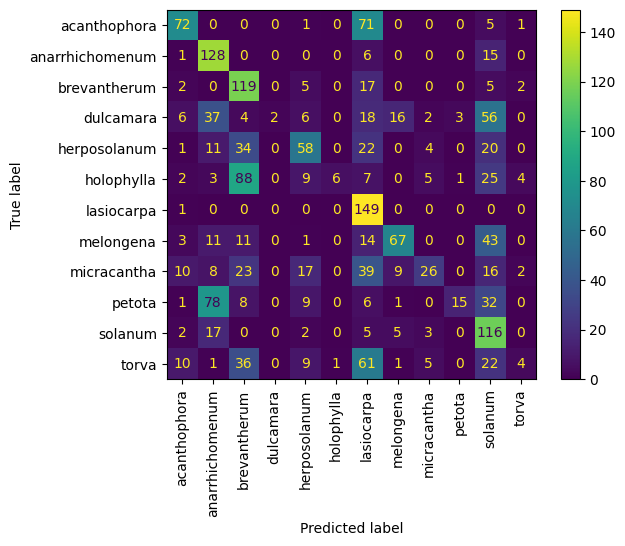

In [ ]:
# Fetch the best model that was found
# Get the top 1 models.
models = random_tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

print(str(random_tuner.get_best_hyperparameters()[0].values))


val_gen = get_val_generator(bal_val_set,
                            tf.keras.applications.vgg16.preprocess_input,
                            batch_size=32)

val_model_predictions = best_model.predict(val_gen,
                                           #steps=val_gen.n // (val_gen.batch_size + 1)
                                           #steps=10
                                          )

pred_report = print_dataset_prediction_report(val_model_predictions,
                                              val_gen.classes,
                                              get_class_names(val_gen))

## Retraining with the best parameters

In [ ]:
oversampler = RandomOverSampler(sampling_strategy="all",
                                random_state=RANDOM_SEED)

final_training_set = imbsample(oversampler, training_set)

# Shuffle the data
final_training_set = final_training_set.sample(frac=1,
                                               random_state=RANDOM_SEED).reset_index(drop=True)

display(final_training_set.head(10))
display(count_rows_by_column(final_training_set, "section"))

species  filesize_mb image_type   source  \
0         tampicense       0.0342        jpg     gbif   
1         wendlandii       0.0345        jpg     gbif   
2        glaucescens       0.0196        jpg  idigbio   
3         tampicense       0.0268        jpg     gbif   
4          erianthum       0.0315        jpg     gbif   
5      cardiophyllum       0.0314        jpg     gbif   
6     appendiculatum       0.0181        jpg  idigbio   
7         umbellatum       0.0347        jpg     gbif   
8         verrucosum       0.0297        jpg     gbif   
9  brevipedicellatum       0.0352        jpg  idigbio   

                                           full_path          section  
0  P:/CODE/ITESM/tesis-dataset-downloader/solanum...      micracantha  
1  P:/CODE/ITESM/tesis-dataset-downloader/solanum...     herposolanum  
2  P:/CODE/ITESM/tesis-dataset-downloader/solanum...     herposolanum  
3  P:/CODE/ITESM/tesis-dataset-downloader/solanum...      micracantha  
4  P:/CODE/ITESM/tesis-dataset-downloader/solanum...     brevantherum  
5  P:/CODE/ITESM/tesis-dataset-downloader/solanum...           petota  
6  P:/CODE/ITESM/tesis-dataset-downloader/solanum...  anarrhichomenum  
7  P:/CODE/ITESM/tesis-dataset-downloader/solanum...     brevantherum  
8  P:/CODE/ITESM/tesis-dataset-downloader/solanum...           petota  
9  P:/CODE/ITESM/tesis-dataset-downloader/solanum...     brevantherum

section  count
0      acanthophora   1560
1   anarrhichomenum   1560
2      brevantherum   1560
3         dulcamara   1560
4      herposolanum   1560
5        holophylla   1560
6        lasiocarpa   1560
7         melongena   1560
8       micracantha   1560
9            petota   1560
10          solanum   1560
11            torva   1560

Found 18720 validated image filenames belonging to 12 classes.
Epoch 1/500
64/64 [==============================] - 4s 54ms/step - loss: 47.4903 - accuracy: 0.1465
Epoch 2/500
64/64 [==============================] - 4s 52ms/step - loss: 11.3384 - accuracy: 0.2319
Epoch 3/500
64/64 [==============================] - 4s 52ms/step - loss: 10.6408 - accuracy: 0.2593
Epoch 4/500
64/64 [==============================] - 4s 50ms/step - loss: 8.1242 - accuracy: 0.2598
Epoch 5/500
64/64 [==============================] - 4s 50ms/step - loss: 9.3879 - accuracy: 0.2612
Epoch 6/500
64/64 [==============================] - 4s 50ms/step - loss: 9.8072 - accuracy: 0.2812
Epoch 7/500
64/64 [==============================] - 4s 51ms/step - loss: 10.9493 - accuracy: 0.2783
Epoch 8/500
64/64 [==============================] - 4s 51ms/step - loss: 10.3886 - accuracy: 0.2988
Epoch 9/500
64/64 [==============================] - 4s 52ms/step - loss: 11.0995 - accuracy: 0.3086
Epoch 10/500
64/64 [===========

C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charlie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

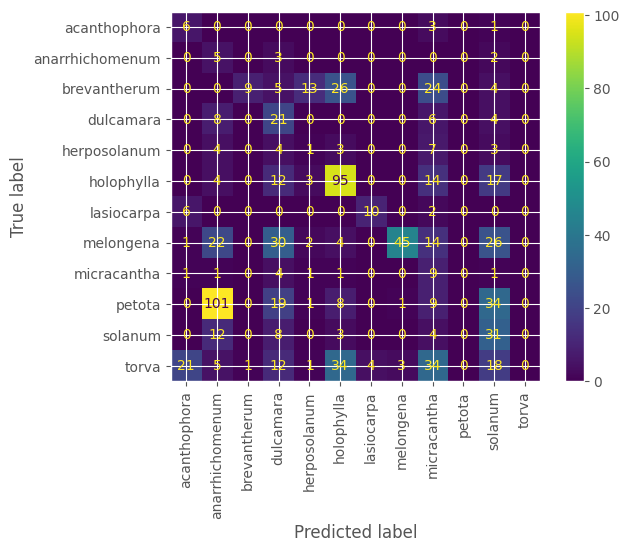

CPU times: total: 51min 32s
Wall time: 7min 59s


In [ ]:
%%time

preproc_func = tf.keras.applications.vgg16.preprocess_input

train_data_gen = get_train_generator(preproc_func, final_training_set, batch_size=32)

vgg16_tl_model = tf.keras.applications.vgg16.VGG16(
        include_top=True,
        weights='imagenet',
        pooling="max",
        classifier_activation='softmax',
    )

# Change the output prediction layer to support the 12 classes instead of the 1000 classes in ImageNet
output = vgg16_tl_model.layers[-2].output
predictions = tf.keras.layers.Dense(NUM_CLASSES,
                                    activation="softmax")(output)
vgg16_tl_model = tf.keras.Model(inputs = vgg16_tl_model.input,
                                outputs = predictions)

# Freeze all layers but the FC and output
for layer in (vgg16_tl_model.layers)[:-1]:
    layer.trainable = False

# Add an optimizer
vgg16_tl_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.03),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Add a progress bar and save checkpoints
vgg16_tl_callbacks = [
    # create_model_checkpoint(os.path.join(DATA_ROOT_LOCATION, f"vgg16_tl_final.h5")),
    tf.keras.callbacks.ProgbarLogger(
        count_mode = 'steps',
        stateful_metrics = None
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=0,
        patience=100,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )
]

fit_params = {
                "x": train_data_gen,
                "epochs": 500,
                "callbacks": vgg16_tl_callbacks,
                "steps_per_epoch": 64,
                "batch_size": 32,
                "workers": 10,
                }
    
with tf.device(TRAINING_DEVICE_NAME):

    vgg16_tl_training_history = vgg16_tl_model.fit(**fit_params)

    # Pass the raw DataFrame so that the ImageDataGen is generated properly
    #  We plug the test_set to evaluate how well the final model generalized
    fit_params["validation_data"] = test_set
    
    
    _, pred_report = evaluate_model(vgg16_tl_model,
                                    vgg16_tl_training_history,
                                    fit_params=fit_params,
                                    preproc_func=preproc_func,
                                    print_loss_graphs=False)
